In [22]:
# Import the libraries and classes

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay, davies_bouldin_score, silhouette_score
from sklearn.cluster import KMeans, DBSCAN

from keras.models import Sequential
# Dense allows for defining fully-connected layers in the network
# Dropout allows for setting a dropout rate on layers in the network
from keras.layers import Dense, Dropout, Input

# Optimizer in model training 
from tensorflow.keras.optimizers import Adam
# Used as a loss function during model training
from keras.losses import mean_squared_error
# Used to evaluate the model's performance during training and/or validation
from keras.metrics import mean_squared_error

from keras.callbacks import EarlyStopping

In [23]:
# Download latest data for streaming service
df = pd.read_csv("Streaming.csv")

# Check head and tail of dataframe made with streaming service data
df

,Customer_ID,Age,Gender,Subscription_Length,Region,Payment_Method,Support_Tickets_Raised,Satisfaction_Score,Discount_Offered,Last_Activity,Monthly_Spend,Churned
0,CUST000001,56.0,Male,54,South,PayPal,0,9.0,6.42,319,62.11,1
1,CUST000002,69.0,Female,21,East,Debit Card,1,2.0,13.77,166,37.27,1
2,CUST000003,46.0,Female,49,East,PayPal,3,8.0,19.91,207,61.82,0
3,CUST000004,32.0,Male,47,West,Debit Card,3,1.0,13.39,108,40.96,1
4,CUST000005,60.0,Male,6,East,Credit Card,2,NaN,13.18,65,45.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,CUST004996,24.0,Male,5,East,Debit Card,0,8.0,18.03,121,51.61,0
4996,CUST004997,66.0,Female,12,East,PayPal,3,5.0,5.84,192,36.32,0
4997,CUST004998,26.0,Female,1,East,Credit Card,2,8.0,6.76,354,42.07,1
4998,CUST004999,53.0,Female,44,South,Debit Card,1,10.0,5.95,31,60.09,0


In [24]:
# Data cleaning and preparation (check for missing values and duplicate rows)

# Drop duplicates if any exist
df = df.drop_duplicates()

# Drop rows with missing values (age & satisfaction score)
df = df.dropna(subset=["Age"])
df = df.dropna(subset=["Satisfaction_Score"])

df

,Customer_ID,Age,Gender,Subscription_Length,Region,Payment_Method,Support_Tickets_Raised,Satisfaction_Score,Discount_Offered,Last_Activity,Monthly_Spend,Churned
0,CUST000001,56.0,Male,54,South,PayPal,0,9.0,6.42,319,62.11,1
1,CUST000002,69.0,Female,21,East,Debit Card,1,2.0,13.77,166,37.27,1
2,CUST000003,46.0,Female,49,East,PayPal,3,8.0,19.91,207,61.82,0
3,CUST000004,32.0,Male,47,West,Debit Card,3,1.0,13.39,108,40.96,1
6,CUST000007,38.0,Female,49,East,Debit Card,2,5.0,7.09,353,48.90,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,CUST004996,24.0,Male,5,East,Debit Card,0,8.0,18.03,121,51.61,0
4996,CUST004997,66.0,Female,12,East,PayPal,3,5.0,5.84,192,36.32,0
4997,CUST004998,26.0,Female,1,East,Credit Card,2,8.0,6.76,354,42.07,1
4998,CUST004999,53.0,Female,44,South,Debit Card,1,10.0,5.95,31,60.09,0


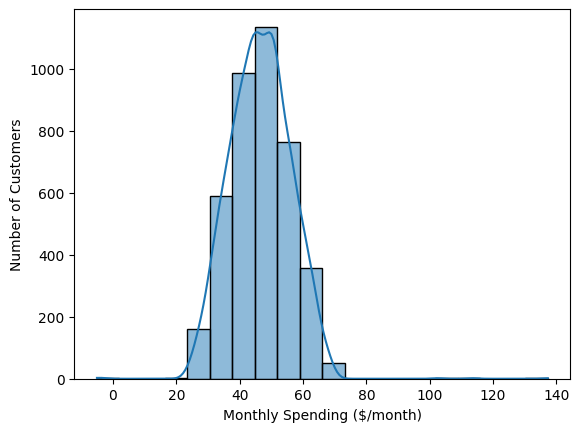

In [4]:
# Exploratory Data Analysis with visualisation tools

# Simple histogram for Monthly_Spend
sns.histplot(df["Monthly_Spend"], bins = 20, kde = True)

# Label and show histogram properly
plt.xlabel("Monthly Spending ($/month)")
plt.ylabel("Number of Customers")
plt.show()

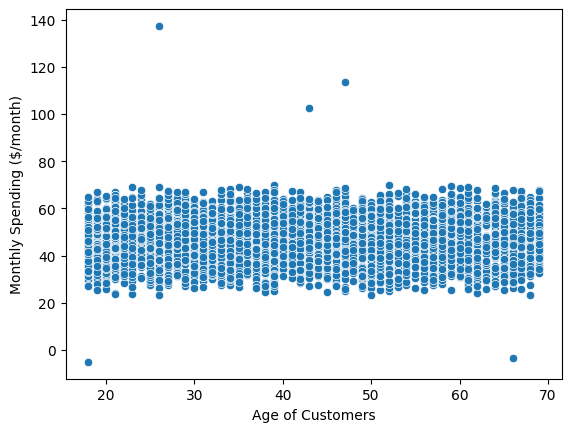

In [63]:
# Visually explore with scatterplots/heatmaps monthly spending vs. other numerical values

# vs. Age
sns.scatterplot(data = df, y = "Monthly_Spend", x = "Age")

# Label and show scatterplot properly
plt.ylabel("Monthly Spending ($/month)")
plt.xlabel("Age of Customers")
plt.show()

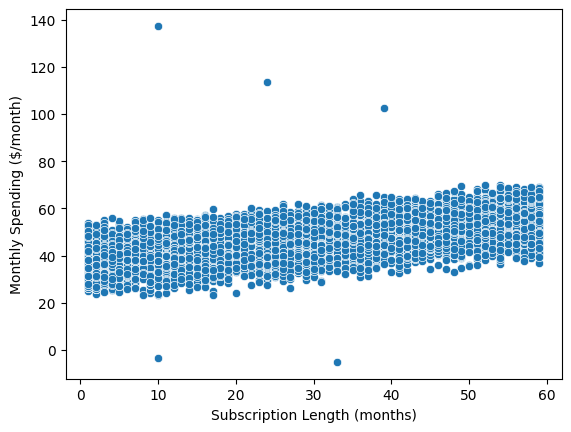

In [64]:
# vs. Subscription Length
sns.scatterplot(data = df, y = "Monthly_Spend", x = "Subscription_Length")

# Label and show scatterplot properly
plt.ylabel("Monthly Spending ($/month)")
plt.xlabel("Subscription Length (months)")
plt.show()

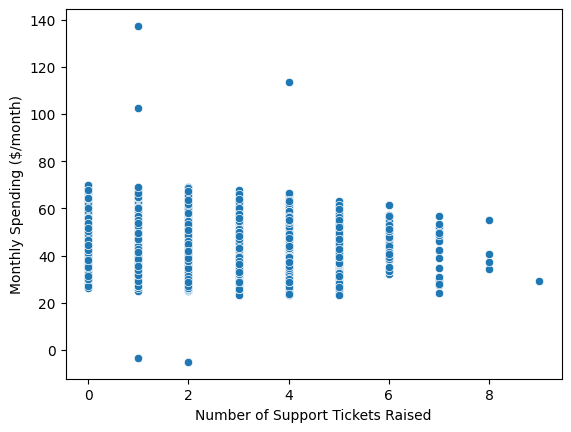

In [65]:
# vs. Support Tickets Raised
sns.scatterplot(data = df, y = "Monthly_Spend", x = "Support_Tickets_Raised")

# Label and show scatterplot properly
plt.ylabel("Monthly Spending ($/month)")
plt.xlabel("Number of Support Tickets Raised")
plt.show()

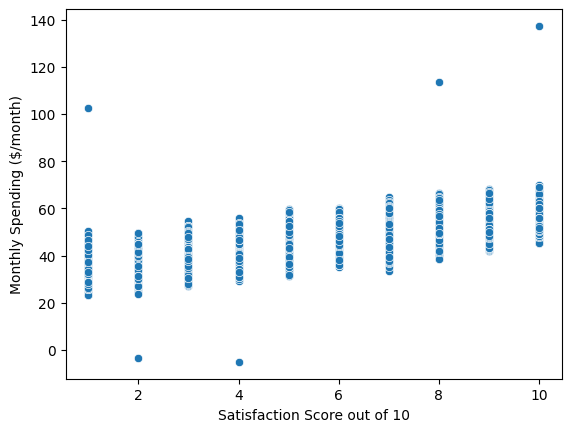

In [66]:
# vs. Satisfaction Score
sns.scatterplot(data = df, y = "Monthly_Spend", x = "Satisfaction_Score")

# Label and show scatterplot properly
plt.ylabel("Monthly Spending ($/month)")
plt.xlabel("Satisfaction Score out of 10")
plt.show()

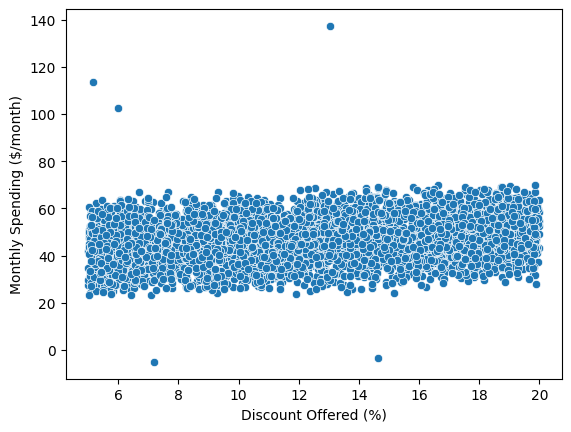

In [67]:
# vs. Discount Offered
sns.scatterplot(data = df, y = "Monthly_Spend", x = "Discount_Offered")

# Label and show scatterplot properly
plt.ylabel("Monthly Spending ($/month)")
plt.xlabel("Discount Offered (%)")
plt.show()

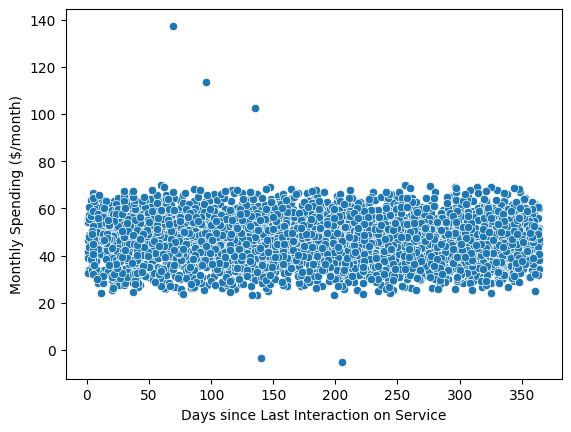

In [68]:
# vs. Last Activity
sns.scatterplot(data = df, y = "Monthly_Spend", x = "Last_Activity")

# Label and show scatterplot properly
plt.ylabel("Monthly Spending ($/month)")
plt.xlabel("Days since Last Interaction on Service")
plt.show()

<Axes: >

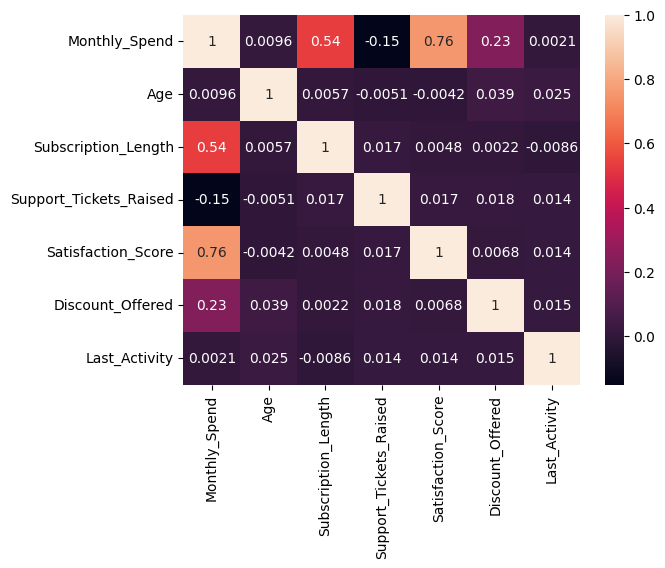

In [69]:
# Make heatmap to see correlations between the numerical variables in the dataset
# The closer that the coefficient magnitude is to (+/-) 1 the stronger the correlation
# (positive/negative correlation respective to +/-1 coefficient magnitude)

# List all numerical columns from the dataset
column_list = ["Monthly_Spend", "Age", "Subscription_Length","Support_Tickets_Raised", 
               "Satisfaction_Score", "Discount_Offered", "Last_Activity"]

# Calculate the correlation coefficients, and then plot the heatmap
sns.heatmap(df[column_list].corr(), annot = True)

In [70]:
# Make the Linear Model for Numerical Values vs Monthly Spending

# Linear Model for Age

# Extract input and output feature as x and y respectively
y = df["Monthly_Spend"]
x = df["Age"]

# Reshape x to a multi-dimensional (2D) numpy array for sklearn modeling 
# ex. x = [#, #, #] -> x = [[#], [#], [#]]
x = x.to_numpy().reshape(-1, 1)

# Split the data to train and test
# For now, we can use an 80/20 split for train/test data
# test_size = 0.2 specifies the 20% data allocated for testing
# random_state is just a number to randomly split the data in a reproducible way
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 23)

print("%d data points in the training set." % (len(x_train), )) 
# 3242 data points in the training set.
print("%d data points in the testing set." % (len(x_test), ))
# 811 data points in the testing set.

# Fit a standard scaler to the input data using the training dataset
scale = StandardScaler()

# Used to find the mean (0 on the curve) and standard deviation (of 1) in x
scale.fit(x_train)

# Apply standard scaler transformation to the x dataset (training and testing)
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

# Build the linear regression model with training data
spend_linear = LinearRegression()

# Fit the model to the training data
spend_linear.fit(x_train_scaled, y_train)

# Get the fit coefficients from the best-fit model.
gradient = spend_linear.coef_[0] # slope; m in y = mx + b for line of best fit
intercept = spend_linear.intercept_ # y intercept; b in y = mx + b for line of best fit
# Print the coefficients.
print("gradient: ", gradient)
print("intercept: ", intercept)

# ^ This is with rescaled input data (so that the mean is 0 & standard deviation = 1)!

3242 data points in the training set.
811 data points in the testing set.
gradient:  0.058748209178865037
intercept:  46.59065083281925


Mean absolute error:  7.437721449204923
Mean squared error:  85.7907621567125
Root mean squared error:  9.26233027681007
R2:  -0.00040423781054887975


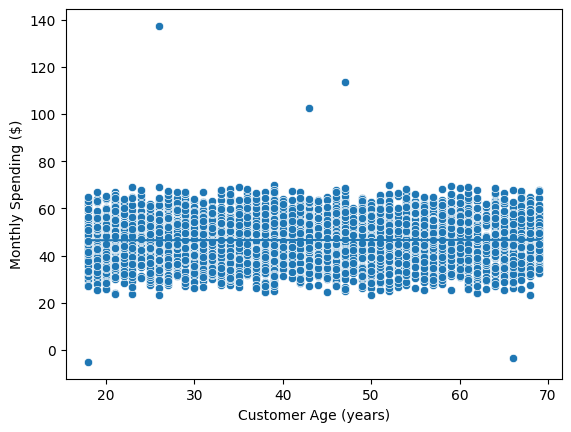

In [71]:
# Evaluate the Linear Model for Numerical Values vs Monthly Spending

# Testing Linear Model for Age

# Predict the monthly spending of customers in the testing dataset using the model from above.
spend_pred = spend_linear.predict(x_test_scaled)

# Calculate the mean absolute error
# The typical error/uncertainty of predictions using the same unit as y (i.e. years, %, $, etc)
mean_abs = mean_absolute_error(y_test, spend_pred) 

# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, spend_pred)

# Calculate the root mean squared error (square root of the mean squared error)
# The typical error/uncertainty of predictions using the same unit as y (i.e. years, %, $, etc)
rms_error = np.sqrt(mean_squared)

# Calculate the R2 score
# Overall measure of how well the model is performing (the closer to 1, the better the model is)
R2 = r2_score(y_test, spend_pred)

# Print the results of these metrics.
print("Mean absolute error: ", mean_abs) # 13.23219700180291
print("Mean squared error: ", mean_squared) # 234.3106399924486
print("Root mean squared error: ", rms_error) # 15.307208759027512
print("R2: ", R2) # 0.0002356158182279522

# Visually show the line of best fit

# Create an array of values covering the range 
x_fit = np.arange(18, 70, 1).reshape(-1, 1) 

# Standardise 
x_fit_scaled = scale.transform(x_fit)

# Apply the model to the scaled input for the y-values for the best-fit line.
y_fit = spend_linear.predict(x_fit_scaled)

# Create a scatter plot for monthly spend vs age
sns.scatterplot(data = df, y = "Monthly_Spend", x = "Age")

# Plot the best-fit line
plt.plot(x_fit, y_fit)
# Label both axes
plt.ylabel("Monthly Spending ($)")
plt.xlabel("Customer Age (years)")
# Show the plot
plt.show()

In [72]:
# Make the Linear Model for Numerical Values vs Monthly Spending

# Linear Model for Subscription Length 
# (Code is mostly the same as the previous model, just tailored for a new numerical value type)

# Extract input and output feature as x and y respectively
y = df["Monthly_Spend"]
x = df["Subscription_Length"]

# Reshape x to a multi-dimensional (2D) numpy array for sklearn modeling 
# ex. x = [#, #, #] -> x = [[#], [#], [#]]
x = x.to_numpy().reshape(-1, 1)

# Split the data to train and test
# For now, we can use an 80/20 split for train/test data
# test_size = 0.2 specifies the 20% data allocated for testing
# random_state is just a number to randomly split the data in a reproducible way
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 23)

print("%d data points in the training set." % (len(x_train), )) 
print("%d data points in the testing set." % (len(x_test), ))

# Fit a standard scaler to the input data using the training dataset
scale = StandardScaler()

# Used to find the mean (0 on the curve) and standard deviation (of 1) in x
scale.fit(x_train)

# Apply standard scaler transformation to the x dataset (training and testing)
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

# Build the linear regression model with training data
spend_linear = LinearRegression()

# Fit the model to the training data
spend_linear.fit(x_train_scaled, y_train)

# Get the fit coefficients from the best-fit model.
gradient = spend_linear.coef_[0] # slope; m in y = mx + b for line of best fit
intercept = spend_linear.intercept_ # y intercept; b in y = mx + b for line of best fit
# Print the coefficients.
print("gradient: ", gradient)
print("intercept: ", intercept)

# ^ This is with rescaled input data (so that the mean is 0 & standard deviation = 1)!

3242 data points in the training set.
811 data points in the testing set.
gradient:  5.232722303889042
intercept:  46.59065083281925


Mean absolute error:  6.8298095900665405
Mean squared error:  64.66296301750712
Root mean squared error:  8.041328436117201
R2:  0.24596657488676388


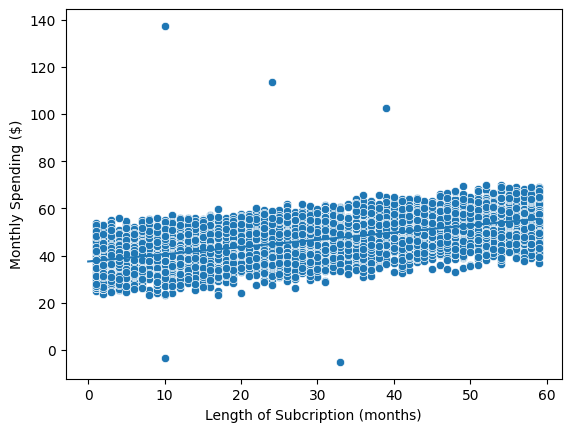

In [73]:
# Evaluate the Linear Model for Numerical Values vs Monthly Spending

# Testing Linear Model for Subscription Length
# (Code is mostly the same as the previous model, just tailored for a new numerical value type)

# Predict the monthly spending of customers in the testing dataset using the model from above.
spend_pred = spend_linear.predict(x_test_scaled)

# Calculate the mean absolute error
# The typical error/uncertainty of predictions using the same unit as y (i.e. years, %, $, etc)
mean_abs = mean_absolute_error(y_test, spend_pred) 

# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, spend_pred)

# Calculate the root mean squared error (square root of the mean squared error)
# The typical error/uncertainty of predictions using the same unit as y (i.e. years, %, $, etc)
rms_error = np.sqrt(mean_squared)

# Calculate the R2 score
# Overall measure of how well the model is performing (the closer to 1, the better the model is)
R2 = r2_score(y_test, spend_pred)

# Print the results of these metrics.
print("Mean absolute error: ", mean_abs) 
print("Mean squared error: ", mean_squared) 
print("Root mean squared error: ", rms_error)
print("R2: ", R2) 

# Visually show the line of best fit

# Create an array of values covering the range 
x_fit = np.arange(0, 60, 1).reshape(-1, 1)

# Standardise 
x_fit_scaled = scale.transform(x_fit)

# Apply the model to the scaled input for the y-values for the best-fit line.
y_fit = spend_linear.predict(x_fit_scaled)

# Create a scatter plot for monthly spend vs new numerical value
sns.scatterplot(data = df, y = "Monthly_Spend", x = "Subscription_Length")

# Plot the best-fit line
plt.plot(x_fit, y_fit)
# Label both axes
plt.ylabel("Monthly Spending ($)")
plt.xlabel("Length of Subcription (months)")
# Show the plot
plt.show()

In [74]:
# Make the Linear Model for Numerical Values vs Monthly Spending

# Linear Model for Support Tickets Raised 
# (Code is mostly the same as the previous model, just tailored for a new numerical value type)

# Extract input and output feature as x and y respectively
y = df["Monthly_Spend"]
x = df["Support_Tickets_Raised"]

# Reshape x to a multi-dimensional (2D) numpy array for sklearn modeling 
# ex. x = [#, #, #] -> x = [[#], [#], [#]]
x = x.to_numpy().reshape(-1, 1)

# Split the data to train and test
# For now, we can use an 80/20 split for train/test data
# test_size = 0.2 specifies the 20% data allocated for testing
# random_state is just a number to randomly split the data in a reproducible way
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 23)

print("%d data points in the training set." % (len(x_train), )) 
print("%d data points in the testing set." % (len(x_test), ))

# Fit a standard scaler to the input data using the training dataset
scale = StandardScaler()

# Used to find the mean (0 on the curve) and standard deviation (of 1) in x
scale.fit(x_train)

# Apply standard scaler transformation to the x dataset (training and testing)
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

# Build the linear regression model with training data
spend_linear = LinearRegression()

# Fit the model to the training data
spend_linear.fit(x_train_scaled, y_train)

# Get the fit coefficients from the best-fit model.
gradient = spend_linear.coef_[0] # slope; m in y = mx + b for line of best fit
intercept = spend_linear.intercept_ # y intercept; b in y = mx + b for line of best fit
# Print the coefficients.
print("gradient: ", gradient)
print("intercept: ", intercept)

# ^ This is with rescaled input data (so that the mean is 0 & standard deviation = 1)!

3242 data points in the training set.
811 data points in the testing set.
gradient:  -1.5236273117973496
intercept:  46.59065083281925


Mean absolute error:  7.415164513085095
Mean squared error:  84.74535141812267
Root mean squared error:  9.205723839987959
R2:  0.01178627439433777


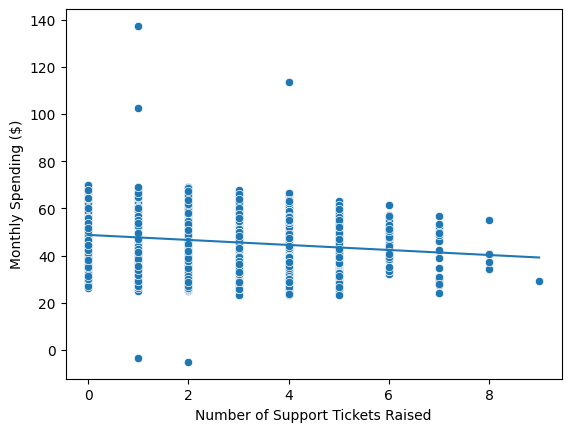

In [75]:
# Evaluate the Linear Model for Numerical Values vs Monthly Spending

# Testing Linear Model for Support Tickets Raised 
# (Code is mostly the same as the previous model, just tailored for a new numerical value type)

# Predict the monthly spending of customers in the testing dataset using the model from above.
spend_pred = spend_linear.predict(x_test_scaled)

# Calculate the mean absolute error
# The typical error/uncertainty of predictions using the same unit as y (i.e. years, %, $, etc)
mean_abs = mean_absolute_error(y_test, spend_pred) 

# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, spend_pred)

# Calculate the root mean squared error (square root of the mean squared error)
# The typical error/uncertainty of predictions using the same unit as y (i.e. years, %, $, etc)
rms_error = np.sqrt(mean_squared)

# Calculate the R2 score
# Overall measure of how well the model is performing (the closer to 1, the better the model is)
R2 = r2_score(y_test, spend_pred)

# Print the results of these metrics.
print("Mean absolute error: ", mean_abs) 
print("Mean squared error: ", mean_squared) 
print("Root mean squared error: ", rms_error)
print("R2: ", R2) 

# Visually show the line of best fit

# Create an array of values covering the range 
x_fit = np.arange(0, 10, 1).reshape(-1, 1)

# Standardise 
x_fit_scaled = scale.transform(x_fit)

# Apply the model to the scaled input for the y-values for the best-fit line.
y_fit = spend_linear.predict(x_fit_scaled)

# Create a scatter plot for monthly spend vs new numerical value 
sns.scatterplot(data = df, y = "Monthly_Spend", x = "Support_Tickets_Raised")

# Plot the best-fit line
plt.plot(x_fit, y_fit)
# Label both axes
plt.ylabel("Monthly Spending ($)")
plt.xlabel("Number of Support Tickets Raised")
# Show the plot
plt.show()

In [76]:
# Make the Linear Model for Numerical Values vs Monthly Spending

# Linear Model for Satisfaction Score
# (Code is mostly the same as the previous model, just tailored for a new numerical value type)

# Extract input and output feature as x and y respectively
y = df["Monthly_Spend"]
x = df["Satisfaction_Score"]

# Reshape x to a multi-dimensional (2D) numpy array for sklearn modeling 
# ex. x = [#, #, #] -> x = [[#], [#], [#]]
x = x.to_numpy().reshape(-1, 1)

# Split the data to train and test
# For now, we can use an 80/20 split for train/test data
# test_size = 0.2 specifies the 20% data allocated for testing
# random_state is just a number to randomly split the data in a reproducible way
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 23)

print("%d data points in the training set." % (len(x_train), )) 
print("%d data points in the testing set." % (len(x_test), ))

# Fit a standard scaler to the input data using the training dataset
scale = StandardScaler()

# Used to find the mean (0 on the curve) and standard deviation (of 1) in x
scale.fit(x_train)

# Apply standard scaler transformation to the x dataset (training and testing)
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

# Build the linear regression model with training data
spend_linear = LinearRegression()

# Fit the model to the training data
spend_linear.fit(x_train_scaled, y_train)

# Get the fit coefficients from the best-fit model.
gradient = spend_linear.coef_[0] # slope; m in y = mx + b for line of best fit
intercept = spend_linear.intercept_ # y intercept; b in y = mx + b for line of best fit
# Print the coefficients.
print("gradient: ", gradient)
print("intercept: ", intercept)

# ^ This is with rescaled input data (so that the mean is 0 & standard deviation = 1)!

3242 data points in the training set.
811 data points in the testing set.
gradient:  7.2602388369971
intercept:  46.59065083281925


Mean absolute error:  4.866892022734636
Mean squared error:  35.771239943896944
Root mean squared error:  5.980906281149784
R2:  0.5828723380934259


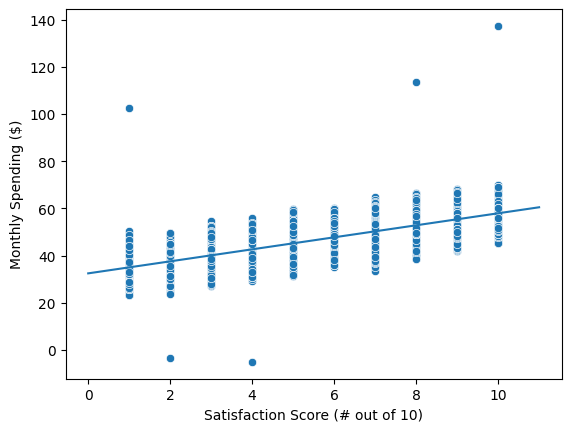

In [77]:
# Evaluate the Linear Model for Numerical Values vs Monthly Spending

# Testing Linear Model for Satisfaction Score
# (Code is mostly the same as the previous model, just tailored for a new numerical value type)

# Predict the monthly spending of customers in the testing dataset using the model from above.
spend_pred = spend_linear.predict(x_test_scaled)

# Calculate the mean absolute error
# The typical error/uncertainty of predictions using the same unit as y (i.e. years, %, $, etc)
mean_abs = mean_absolute_error(y_test, spend_pred) 

# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, spend_pred)

# Calculate the root mean squared error (square root of the mean squared error)
# The typical error/uncertainty of predictions using the same unit as y (i.e. years, %, $, etc)
rms_error = np.sqrt(mean_squared)

# Calculate the R2 score
# Overall measure of how well the model is performing (the closer to 1, the better the model is)
R2 = r2_score(y_test, spend_pred)

# Print the results of these metrics.
print("Mean absolute error: ", mean_abs) 
print("Mean squared error: ", mean_squared) 
print("Root mean squared error: ", rms_error)
print("R2: ", R2) 

# Visually show the line of best fit

# Create an array of values covering the range 
x_fit = np.arange(0, 12, 1).reshape(-1, 1) # min = -5.06 and max = 137.31

# Standardise 
x_fit_scaled = scale.transform(x_fit)

# Apply the model to the scaled input for the y-values for the best-fit line.
y_fit = spend_linear.predict(x_fit_scaled)

# Create a scatter plot for monthly spend vs new numerical value 
sns.scatterplot(data = df, y = "Monthly_Spend", x = "Satisfaction_Score")

# Plot the best-fit line
plt.plot(x_fit, y_fit)
# Label both axes
plt.ylabel("Monthly Spending ($)")
plt.xlabel("Satisfaction Score (# out of 10)")
# Show the plot
plt.show()

In [78]:
# Make the Linear Model for Numerical Values vs Monthly Spending

# Linear Model for Discount Offered
# (Code is mostly the same as the previous model, just tailored for a new numerical value type)

# Extract input and output feature as x and y respectively
y = df["Monthly_Spend"]
x = df["Discount_Offered"]

# Reshape x to a multi-dimensional (2D) numpy array for sklearn modeling 
# ex. x = [#, #, #] -> x = [[#], [#], [#]]
x = x.to_numpy().reshape(-1, 1)

# Split the data to train and test
# For now, we can use an 80/20 split for train/test data
# test_size = 0.2 specifies the 20% data allocated for testing
# random_state is just a number to randomly split the data in a reproducible way
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 23)

print("%d data points in the training set." % (len(x_train), )) 
print("%d data points in the testing set." % (len(x_test), ))

# Fit a standard scaler to the input data using the training dataset
scale = StandardScaler()

# Used to find the mean (0 on the curve) and standard deviation (of 1) in x
scale.fit(x_train)

# Apply standard scaler transformation to the x dataset (training and testing)
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

# Build the linear regression model with training data
spend_linear = LinearRegression()

# Fit the model to the training data
spend_linear.fit(x_train_scaled, y_train)

# Get the fit coefficients from the best-fit model.
gradient = spend_linear.coef_[0] # slope; m in y = mx + b for line of best fit
intercept = spend_linear.intercept_ # y intercept; b in y = mx + b for line of best fit
# Print the coefficients.
print("gradient: ", gradient)
print("intercept: ", intercept)

# ^ This is with rescaled input data (so that the mean is 0 & standard deviation = 1)!

3242 data points in the training set.
811 data points in the testing set.
gradient:  2.144951778599845
intercept:  46.59065083281925


Mean absolute error:  7.242927105614366
Mean squared error:  80.24478332156286
Root mean squared error:  8.957945262255338
R2:  0.06426730245804635


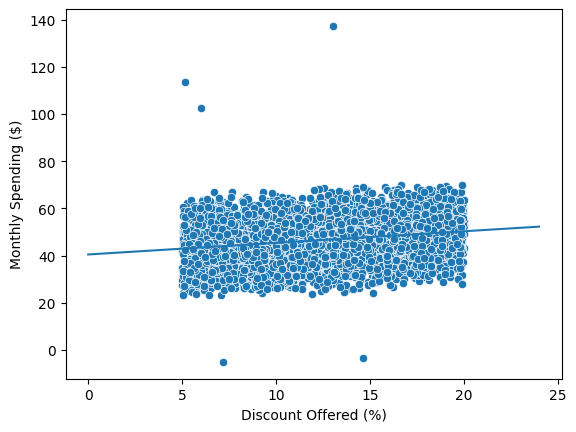

In [79]:
# Evaluate the Linear Model for Numerical Values vs Monthly Spending

# Testing Linear Model for Discount Offered
# (Code is mostly the same as the previous model, just tailored for a new numerical value type)

# Predict the monthly spending of customers in the testing dataset using the model from above.
spend_pred = spend_linear.predict(x_test_scaled)

# Calculate the mean absolute error
# The typical error/uncertainty of predictions using the same unit as y (i.e. years, %, $, etc)
mean_abs = mean_absolute_error(y_test, spend_pred) 

# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, spend_pred)

# Calculate the root mean squared error (square root of the mean squared error)
# The typical error/uncertainty of predictions using the same unit as y (i.e. years, %, $, etc)
rms_error = np.sqrt(mean_squared)

# Calculate the R2 score
# Overall measure of how well the model is performing (the closer to 1, the better the model is)
R2 = r2_score(y_test, spend_pred)

# Print the results of these metrics.
print("Mean absolute error: ", mean_abs) 
print("Mean squared error: ", mean_squared) 
print("Root mean squared error: ", rms_error)
print("R2: ", R2) 

# Visually show the line of best fit

# Create an array of values covering the range 
x_fit = np.arange(0, 25, 1).reshape(-1, 1) # min = -5.06 and max = 137.31

# Standardise 
x_fit_scaled = scale.transform(x_fit)

# Apply the model to the scaled input for the y-values for the best-fit line.
y_fit = spend_linear.predict(x_fit_scaled)

# Create a scatter plot for monthly spend vs new numerical value 
sns.scatterplot(data = df, y = "Monthly_Spend", x = "Discount_Offered")

# Plot the best-fit line
plt.plot(x_fit, y_fit)
# Label both axes
plt.ylabel("Monthly Spending ($)")
plt.xlabel("Discount Offered (%)")
# Show the plot
plt.show()

In [80]:
# Make the Linear Model for Numerical Values vs Monthly Spending

# Linear Model for Last Activity
# (Code is mostly the same as the previous model, just tailored for a new numerical value type)

# Extract input and output feature as x and y respectively
y = df["Monthly_Spend"]
x = df["Last_Activity"]

# Reshape x to a multi-dimensional (2D) numpy array for sklearn modeling 
# ex. x = [#, #, #] -> x = [[#], [#], [#]]
x = x.to_numpy().reshape(-1, 1)

# Split the data to train and test
# For now, we can use an 80/20 split for train/test data
# test_size = 0.2 specifies the 20% data allocated for testing
# random_state is just a number to randomly split the data in a reproducible way
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 23)

print("%d data points in the training set." % (len(x_train), )) 
print("%d data points in the testing set." % (len(x_test), ))

# Fit a standard scaler to the input data using the training dataset
scale = StandardScaler()

# Used to find the mean (0 on the curve) and standard deviation (of 1) in x
scale.fit(x_train)

# Apply standard scaler transformation to the x dataset (training and testing)
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

# Build the linear regression model with training data
spend_linear = LinearRegression()

# Fit the model to the training data
spend_linear.fit(x_train_scaled, y_train)

# Get the fit coefficients from the best-fit model.
gradient = spend_linear.coef_[0] # slope; m in y = mx + b for line of best fit
intercept = spend_linear.intercept_ # y intercept; b in y = mx + b for line of best fit
# Print the coefficients.
print("gradient: ", gradient)
print("intercept: ", intercept)

# ^ This is with rescaled input data (so that the mean is 0 & standard deviation = 1)!

3242 data points in the training set.
811 data points in the testing set.
gradient:  -0.10776308502494711
intercept:  46.59065083281925


Mean absolute error:  7.445594997534704
Mean squared error:  85.94127782238589
Root mean squared error:  9.27045186721693
R2:  -0.0021593977603051595


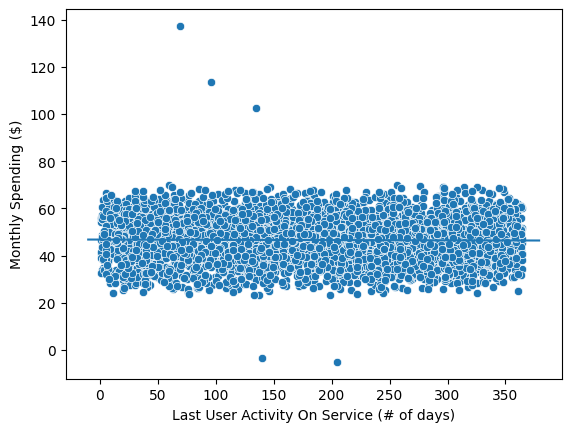

In [81]:
# Evaluate the Linear Model for Numerical Values vs Monthly Spending

# Testing Linear Model for Last Activity
# (Code is mostly the same as the previous model, just tailored for a new numerical value type)

# Predict the monthly spending of customers in the testing dataset using the model from above.
spend_pred = spend_linear.predict(x_test_scaled)

# Calculate the mean absolute error
# The typical error/uncertainty of predictions using the same unit as y (i.e. years, %, $, etc)
mean_abs = mean_absolute_error(y_test, spend_pred) 

# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, spend_pred)

# Calculate the root mean squared error (square root of the mean squared error)
# The typical error/uncertainty of predictions using the same unit as y (i.e. years, %, $, etc)
rms_error = np.sqrt(mean_squared)

# Calculate the R2 score
# Overall measure of how well the model is performing (the closer to 1, the better the model is)
R2 = r2_score(y_test, spend_pred)

# Print the results of these metrics.
print("Mean absolute error: ", mean_abs) 
print("Mean squared error: ", mean_squared) 
print("Root mean squared error: ", rms_error)
print("R2: ", R2) 

# Visually show the line of best fit

# Create an array of values covering the range 
x_fit = np.arange(-10, 380, 1).reshape(-1, 1) # min = -5.06 and max = 137.31

# Standardise 
x_fit_scaled = scale.transform(x_fit)

# Apply the model to the scaled input for the y-values for the best-fit line.
y_fit = spend_linear.predict(x_fit_scaled)

# Create a scatter plot for monthly spend vs new numerical value 
sns.scatterplot(data = df, y = "Monthly_Spend", x = "Last_Activity")

# Plot the best-fit line
plt.plot(x_fit, y_fit)
# Label both axes
plt.ylabel("Monthly Spending ($)")
plt.xlabel("Last User Activity On Service (# of days)")
# Show the plot
plt.show()

coefficients:  [ 0.0598809  -0.14733736]
intercept:  46.73798819729306
Mean absolute error:  7.439025283249205
Mean squared error:  85.79337721650673
Root mean squared error:  9.262471442142573
R2:  -0.00043473196673193826


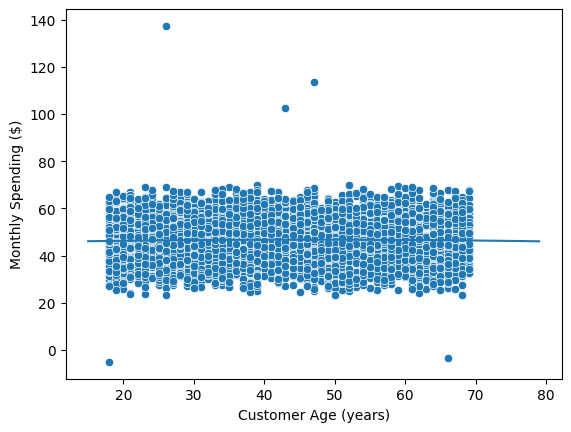

In [11]:
# Compare the Linear Model for Numerical Values vs Monthly Spending with a non-linear model

# Note that many non-linear models exist (polynomial, exponential, logarithmic, etc.)
# These also have various degrees of power applied to input to change
# To keep comparisons the same, the non-linear model we will be using is 
# Polynomial Regression Model with 2 as the degree

# Extract the features
y = df["Monthly_Spend"]
x = df["Age"]

# Re-shape x so that the single input is in 2 dimensions.
x = x.to_numpy().reshape(-1, 1)

# Split the x and y data between the training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 23)

# Standardise data
scale = StandardScaler()
scale.fit(x_train)
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

# degree = 2 since we are using y = mx^2 + b (parabola) for line of best fit
# include_bias = False, as we are not setting the y-intercept
poly = PolynomialFeatures(degree = 2, include_bias = False) 

# Apply the transformation to the scaled input data from the training set.
# Gives us 2D array ([0] = x, [1] = x^2)
x_poly = poly.fit_transform(x_train_scaled)

# Make the model.
spend_poly = LinearRegression()
# Fit the model to the training data.
spend_poly.fit(x_poly, y_train)

# Get the fit coefficients from the model.
coefficients = spend_poly.coef_ # 2 coefficients; 1st for x 2nd for x^2 
intercept = spend_poly.intercept_

# Print the coefficients
print("coefficients: ", coefficients)
print("intercept: ", intercept)


# Use the trained model to predict the monthly spending in the testing dataset.
# First, create the polynomial features from the scaled input in the testing set.
x_test_poly = poly.fit_transform(x_test_scaled)
spend_pred = spend_poly.predict(x_test_poly)
# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, spend_pred)
# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, spend_pred)
# Calculate the root mean squared error
rms_error = np.sqrt(mean_squared)
# Calculate the R2 score
R2 = r2_score(y_test, spend_pred)
# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

# Plot and check visually for good measure

# Create an array of values covering the range
x_fit = np.arange(15, 80, 1).reshape(-1, 1) 
# Apply transformation
x_fit_scaled = scale.transform(x_fit)

# Standardise
x_fit_poly = poly.fit_transform(x_fit_scaled)
y_fit = spend_poly.predict(x_fit_poly)

# Plot
sns.scatterplot(data = df, y = "Monthly_Spend", x = "Age")
plt.plot(x_fit, y_fit)
# Label both axes
plt.ylabel("Monthly Spending ($)")
plt.xlabel("Customer Age (years)")
# Show the plot
plt.show()

coefficients:  [5.23181495 0.0229567 ]
intercept:  46.56769413220778
Mean absolute error:  6.829973869216361
Mean squared error:  tf.Tensor(64.66396166986868, shape=(), dtype=float64)
Root mean squared error:  8.041390530863968
R2:  0.24595492962299093


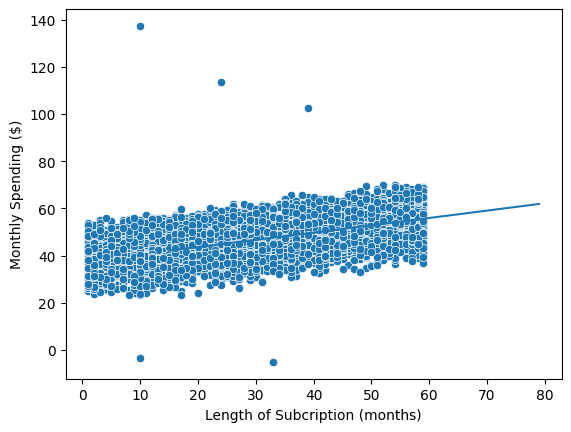

In [25]:
# Compare the Linear Model for Numerical Values vs Monthly Spending with a non-linear model

# Note that many non-linear models exist (polynomial, exponential, logarithmic, etc.)
# These also have various degrees of power applied to input to change
# To keep comparisons the same, the non-linear model we will be using is 
# Polynomial Regression Model with 2 as the degree

# Extract the features
y = df["Monthly_Spend"]
x = df["Subscription_Length"]

# Re-shape x so that the single input is in 2 dimensions.
x = x.to_numpy().reshape(-1, 1)

# Split the x and y data between the training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 23)

# Standardise data
scale = StandardScaler()
scale.fit(x_train)
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

# degree = 2 since we are using y = mx^2 + b (parabola) for line of best fit
# include_bias = False, as we are not setting the y-intercept
poly = PolynomialFeatures(degree = 2, include_bias = False) 

# Apply the transformation to the scaled input data from the training set.
# Gives us 2D array ([0] = x, [1] = x^2)
x_poly = poly.fit_transform(x_train_scaled)

# Make the model.
spend_poly = LinearRegression()
# Fit the model to the training data.
spend_poly.fit(x_poly, y_train)

# Get the fit coefficients from the model.
coefficients = spend_poly.coef_ # 2 coefficients; 1st for x 2nd for x^2 
intercept = spend_poly.intercept_

# Print the coefficients
print("coefficients: ", coefficients)
print("intercept: ", intercept)


# Use the trained model to predict the monthly spending in the testing dataset.
# First, create the polynomial features from the scaled input in the testing set.
x_test_poly = poly.fit_transform(x_test_scaled)
spend_pred = spend_poly.predict(x_test_poly)
# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, spend_pred)
# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, spend_pred)
# Calculate the root mean squared error
rms_error = np.sqrt(mean_squared)
# Calculate the R2 score
R2 = r2_score(y_test, spend_pred)
# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

# Plot and check visually for good measure

# Create an array of values covering the range
x_fit = np.arange(15, 80, 1).reshape(-1, 1) 
# Apply transformation
x_fit_scaled = scale.transform(x_fit)

# Standardise
x_fit_poly = poly.fit_transform(x_fit_scaled)
y_fit = spend_poly.predict(x_fit_poly)

# Plot
sns.scatterplot(data = df, y = "Monthly_Spend", x = "Subscription_Length")
plt.plot(x_fit, y_fit)
# Label both axes
plt.ylabel("Monthly Spending ($)")
plt.xlabel("Length of Subcription (months)")
# Show the plot
plt.show()

coefficients:  [-1.61861949  0.11670781]
intercept:  46.47394302644253
Mean absolute error:  7.407806275988779
Mean squared error:  84.59161226343312
Root mean squared error:  9.197369855748605
R2:  0.013579023380386746


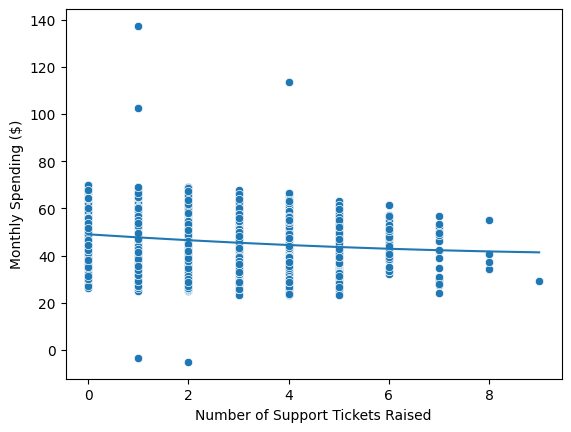

In [23]:
# Compare the Linear Model for Numerical Values vs Monthly Spending with a non-linear model

# Note that many non-linear models exist (polynomial, exponential, logarithmic, etc.)
# These also have various degrees of power applied to input to change
# To keep comparisons the same, the non-linear model we will be using is 
# Polynomial Regression Model with 2 as the degree

# Extract the features
y = df["Monthly_Spend"]
x = df["Support_Tickets_Raised"]

# Re-shape x so that the single input is in 2 dimensions.
x = x.to_numpy().reshape(-1, 1)

# Split the x and y data between the training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 23)

# Standardise data
scale = StandardScaler()
scale.fit(x_train)
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

# degree = 2 since we are using y = mx^2 + b (parabola) for line of best fit
# include_bias = False, as we are not setting the y-intercept
poly = PolynomialFeatures(degree = 2, include_bias = False) 

# Apply the transformation to the scaled input data from the training set.
# Gives us 2D array ([0] = x, [1] = x^2)
x_poly = poly.fit_transform(x_train_scaled)

# Make the model.
spend_poly = LinearRegression()
# Fit the model to the training data.
spend_poly.fit(x_poly, y_train)

# Get the fit coefficients from the model.
coefficients = spend_poly.coef_ # 2 coefficients; 1st for x 2nd for x^2 
intercept = spend_poly.intercept_

# Print the coefficients
print("coefficients: ", coefficients)
print("intercept: ", intercept)


# Use the trained model to predict the monthly spending in the testing dataset.
# First, create the polynomial features from the scaled input in the testing set.
x_test_poly = poly.fit_transform(x_test_scaled)
spend_pred = spend_poly.predict(x_test_poly)
# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, spend_pred)
# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, spend_pred)
# Calculate the root mean squared error
rms_error = np.sqrt(mean_squared)
# Calculate the R2 score
R2 = r2_score(y_test, spend_pred)
# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

# Plot and check visually for good measure

# Create an array of values covering the range
x_fit = np.arange(0, 10, 1).reshape(-1, 1) # min = -5.06 and max = 137.31
# Apply transformation
x_fit_scaled = scale.transform(x_fit)

# Standardise
x_fit_poly = poly.fit_transform(x_fit_scaled)
y_fit = spend_poly.predict(x_fit_poly)

# Plot
sns.scatterplot(data = df, y = "Monthly_Spend", x = "Support_Tickets_Raised")
plt.plot(x_fit, y_fit)
# Label both axes
plt.ylabel("Monthly Spending ($)")
plt.xlabel("Number of Support Tickets Raised")
# Show the plot
plt.show()

coefficients:  [7.26361768 0.12292305]
intercept:  46.46772777783722
Mean absolute error:  4.869456744860792
Mean squared error:  35.78778495747497
Root mean squared error:  5.982289273971543
R2:  0.5826794070448842


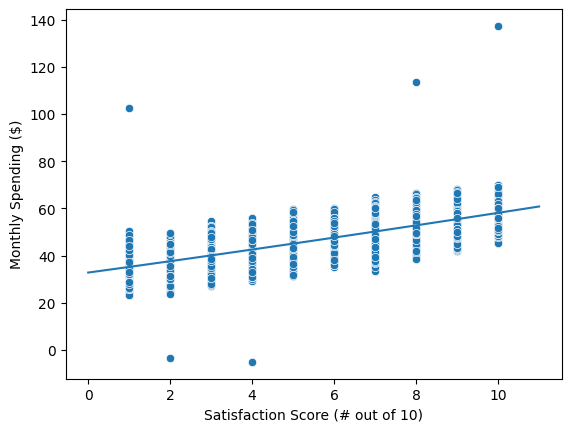

In [25]:
# Compare the Linear Model for Numerical Values vs Monthly Spending with a non-linear model

# Note that many non-linear models exist (polynomial, exponential, logarithmic, etc.)
# These also have various degrees of power applied to input to change
# To keep comparisons the same, the non-linear model we will be using is 
# Polynomial Regression Model with 2 as the degree

# Extract the features
y = df["Monthly_Spend"]
x = df["Satisfaction_Score"]

# Re-shape x so that the single input is in 2 dimensions.
x = x.to_numpy().reshape(-1, 1)

# Split the x and y data between the training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 23)

# Standardise data
scale = StandardScaler()
scale.fit(x_train)
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

# degree = 2 since we are using y = mx^2 + b (parabola) for line of best fit
# include_bias = False, as we are not setting the y-intercept
poly = PolynomialFeatures(degree = 2, include_bias = False) 

# Apply the transformation to the scaled input data from the training set.
# Gives us 2D array ([0] = x, [1] = x^2)
x_poly = poly.fit_transform(x_train_scaled)

# Make the model.
spend_poly = LinearRegression()
# Fit the model to the training data.
spend_poly.fit(x_poly, y_train)

# Get the fit coefficients from the model.
coefficients = spend_poly.coef_ # 2 coefficients; 1st for x 2nd for x^2 
intercept = spend_poly.intercept_

# Print the coefficients
print("coefficients: ", coefficients)
print("intercept: ", intercept)


# Use the trained model to predict the monthly spending in the testing dataset.
# First, create the polynomial features from the scaled input in the testing set.
x_test_poly = poly.fit_transform(x_test_scaled)
spend_pred = spend_poly.predict(x_test_poly)
# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, spend_pred)
# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, spend_pred)
# Calculate the root mean squared error
rms_error = np.sqrt(mean_squared)
# Calculate the R2 score
R2 = r2_score(y_test, spend_pred)
# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

# Plot and check visually for good measure

# Create an array of values covering the range
x_fit = np.arange(0, 12, 1).reshape(-1, 1) # min = -5.06 and max = 137.31
# Apply transformation
x_fit_scaled = scale.transform(x_fit)

# Standardise
x_fit_poly = poly.fit_transform(x_fit_scaled)
y_fit = spend_poly.predict(x_fit_poly)

# Plot
sns.scatterplot(data = df, y = "Monthly_Spend", x = "Satisfaction_Score")
plt.plot(x_fit, y_fit)
# Label both axes
plt.ylabel("Monthly Spending ($)")
plt.xlabel("Satisfaction Score (# out of 10)")
# Show the plot
plt.show()

coefficients:  [2.14504    0.03570171]
intercept:  46.55494912681594
Mean absolute error:  7.2428031447752454
Mean squared error:  80.25081961347581
Root mean squared error:  8.958282179830897
R2:  0.06419691338749178


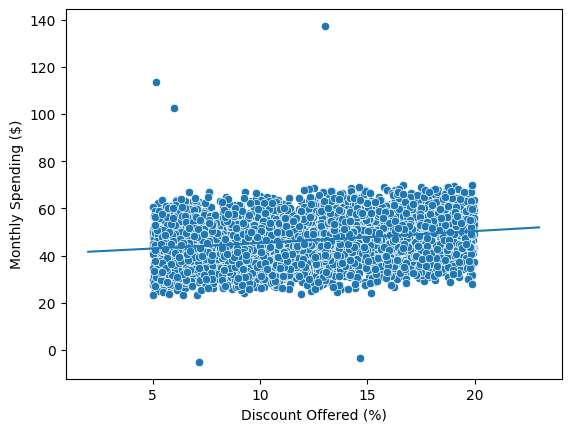

In [31]:
# Compare the Linear Model for Numerical Values vs Monthly Spending with a non-linear model

# Note that many non-linear models exist (polynomial, exponential, logarithmic, etc.)
# These also have various degrees of power applied to input to change
# To keep comparisons the same, the non-linear model we will be using is 
# Polynomial Regression Model with 2 as the degree

# Extract the features
y = df["Monthly_Spend"]
x = df["Discount_Offered"]

# Re-shape x so that the single input is in 2 dimensions.
x = x.to_numpy().reshape(-1, 1)

# Split the x and y data between the training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 23)

# Standardise data
scale = StandardScaler()
scale.fit(x_train)
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

# degree = 2 since we are using y = mx^2 + b (parabola) for line of best fit
# include_bias = False, as we are not setting the y-intercept
poly = PolynomialFeatures(degree = 2, include_bias = False) 

# Apply the transformation to the scaled input data from the training set.
# Gives us 2D array ([0] = x, [1] = x^2)
x_poly = poly.fit_transform(x_train_scaled)

# Make the model.
spend_poly = LinearRegression()
# Fit the model to the training data.
spend_poly.fit(x_poly, y_train)

# Get the fit coefficients from the model.
coefficients = spend_poly.coef_ # 2 coefficients; 1st for x 2nd for x^2 
intercept = spend_poly.intercept_

# Print the coefficients
print("coefficients: ", coefficients)
print("intercept: ", intercept)


# Use the trained model to predict the monthly spending in the testing dataset.
# First, create the polynomial features from the scaled input in the testing set.
x_test_poly = poly.fit_transform(x_test_scaled)
spend_pred = spend_poly.predict(x_test_poly)
# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, spend_pred)
# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, spend_pred)
# Calculate the root mean squared error
rms_error = np.sqrt(mean_squared)
# Calculate the R2 score
R2 = r2_score(y_test, spend_pred)
# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

# Plot and check visually for good measure

# Create an array of values covering the range
x_fit = np.arange(2, 24, 1).reshape(-1, 1) # min = -5.06 and max = 137.31
# Apply transformation
x_fit_scaled = scale.transform(x_fit)

# Standardise
x_fit_poly = poly.fit_transform(x_fit_scaled)
y_fit = spend_poly.predict(x_fit_poly)

# Plot
sns.scatterplot(data = df, y = "Monthly_Spend", x = "Discount_Offered")
plt.plot(x_fit, y_fit)
# Label both axes
plt.ylabel("Monthly Spending ($)")
plt.xlabel("Discount Offered (%)")
# Show the plot
plt.show()

coefficients:  [-0.1065798   0.06109439]
intercept:  46.529556444759955
Mean absolute error:  7.447794733552416
Mean squared error:  85.99870118302148
Root mean squared error:  9.273548467712965
R2:  -0.0028290103372892172


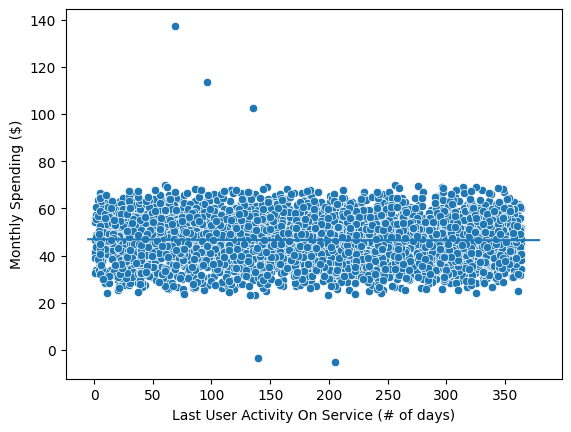

In [32]:
# Compare the Linear Model for Numerical Values vs Monthly Spending with a non-linear model

# Note that many non-linear models exist (polynomial, exponential, logarithmic, etc.)
# These also have various degrees of power applied to input to change
# To keep comparisons the same, the non-linear model we will be using is 
# Polynomial Regression Model with 2 as the degree

# Extract the features
y = df["Monthly_Spend"]
x = df["Last_Activity"]

# Re-shape x so that the single input is in 2 dimensions.
x = x.to_numpy().reshape(-1, 1)

# Split the x and y data between the training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 23)

# Standardise data
scale = StandardScaler()
scale.fit(x_train)
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

# degree = 2 since we are using y = mx^2 + b (parabola) for line of best fit
# include_bias = False, as we are not setting the y-intercept
poly = PolynomialFeatures(degree = 2, include_bias = False) 

# Apply the transformation to the scaled input data from the training set.
# Gives us 2D array ([0] = x, [1] = x^2)
x_poly = poly.fit_transform(x_train_scaled)

# Make the model.
spend_poly = LinearRegression()
# Fit the model to the training data.
spend_poly.fit(x_poly, y_train)

# Get the fit coefficients from the model.
coefficients = spend_poly.coef_ # 2 coefficients; 1st for x 2nd for x^2 
intercept = spend_poly.intercept_

# Print the coefficients
print("coefficients: ", coefficients)
print("intercept: ", intercept)


# Use the trained model to predict the monthly spending in the testing dataset.
# First, create the polynomial features from the scaled input in the testing set.
x_test_poly = poly.fit_transform(x_test_scaled)
spend_pred = spend_poly.predict(x_test_poly)
# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, spend_pred)
# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, spend_pred)
# Calculate the root mean squared error
rms_error = np.sqrt(mean_squared)
# Calculate the R2 score
R2 = r2_score(y_test, spend_pred)
# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

# Plot and check visually for good measure

# Create an array of values covering the range
x_fit = np.arange(-5, 380, 1).reshape(-1, 1)
# Apply transformation
x_fit_scaled = scale.transform(x_fit)

# Standardise
x_fit_poly = poly.fit_transform(x_fit_scaled)
y_fit = spend_poly.predict(x_fit_poly)

# Plot
sns.scatterplot(data = df, y = "Monthly_Spend", x = "Last_Activity")
plt.plot(x_fit, y_fit)
# Label both axes
plt.ylabel("Monthly Spending ($)")
plt.xlabel("Last User Activity On Service (# of days)")
# Show the plot
plt.show()

coefficients:  [ 0.01845221  5.09830318 -1.71663289  7.16472242  2.1709278  -0.06386252]
intercept:  46.59065083281925
Mean absolute error:  0.8767610397426708
Mean squared error:  2.8165990661301277
Root mean squared error:  1.67827264356246
R2:  0.9671556986890651


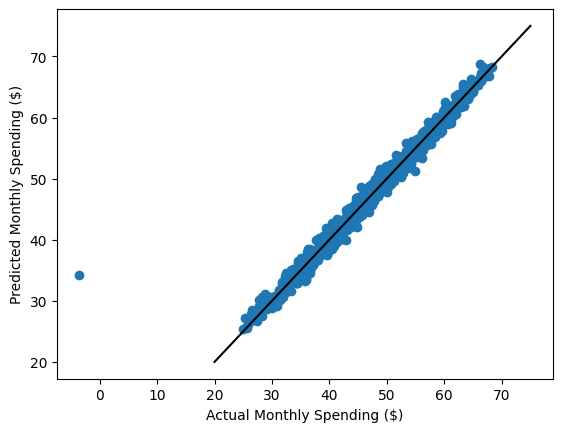

In [65]:
# Multivariable linear regression model

# Extract the input features. No need to reshape x since it is already a 2D array.
feature_names = ["Age", "Subscription_Length", "Support_Tickets_Raised",
                "Satisfaction_Score", "Discount_Offered", "Last_Activity"]
x = df[feature_names]

# Extract the output feature
y = df["Monthly_Spend"]

# Split the x and y data between the training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 23)
                                                    
# Fit the standard scaler to the input data in x_train
scale = StandardScaler()
scale.fit(x_train)

# Apply the standard scaler transformation to the training and testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

# Fit the model to the training data
linear = LinearRegression()
linear.fit(x_train_scaled, y_train)

# Get the fit coefficients
intercept = linear.intercept_
coefficients = linear.coef_
# Print the coefficients.
print("coefficients: ", coefficients)
print("intercept: ", intercept)

# Use the trained model to predict the monthly spend
pred = linear.predict(x_test_scaled)
# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, pred)
# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, pred)
# Calculate the root mean squared error
rms_error = np.sqrt(mean_squared)
# Calculate the R2 score
R2 = r2_score(y_test, pred)
# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

# Plot the predicted vs actual monthly spending
plt.scatter(y_test, pred)

# Draw a diagonal line; if data points lie on/close to the line, the model is good
plt.plot([20, 75], [20, 75], 'k-')

# Label both axes.
plt.xlabel("Actual Monthly Spending ($)")
plt.ylabel("Predicted Monthly Spending ($)")
plt.show()

Mean absolute error:  1.271953267570901
Mean squared error:  tf.Tensor(4.564345645141801, shape=(), dtype=float64)
Root mean squared error:  2.1364329254956265
R2:  0.9467752633099238


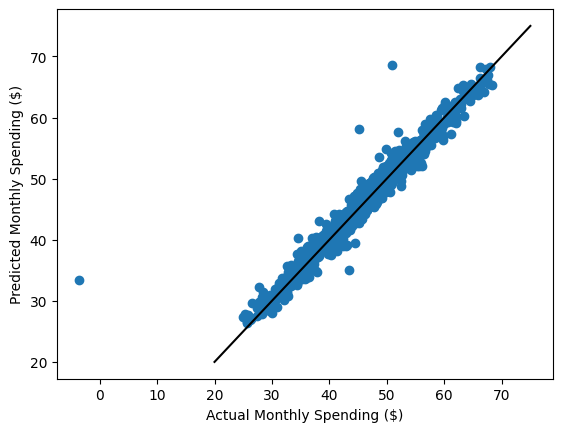

In [24]:
# Multi-variable/categorical random forest regression model

# Start by extracting the three numerical input features.
num_feature_names = ["Age", "Subscription_Length", "Support_Tickets_Raised",
                "Satisfaction_Score", "Discount_Offered", "Last_Activity"]
x_numerical = df[num_feature_names]

# Scale the numerical features using the min-max scaler.
scale = MinMaxScaler()
scale.fit(x_numerical)
x_numerical_scaled = scale.transform(x_numerical)

# Next, extract the categorical variables
x_cat = df[["Gender", "Region", "Payment_Method", "Churned"]]

# Apply Label Encoding to the variables
label = LabelEncoder()
x_cat_label = pd.DataFrame({
    "Gender": label.fit(df["Gender"]).transform(df["Gender"]),
    "Region": label.fit(df["Region"]).transform(df["Region"]),
    "Payment_Method": label.fit(df["Payment_Method"]).transform(df["Payment_Method"]),
    "Churned": label.fit(df["Churned"]).transform(df["Churned"])
})

# Combine categorical and numerical features
x = np.concatenate((x_numerical_scaled, x_cat_label), axis = 1)

# Extract the output feature
y = df["Monthly_Spend"]

# Split the x and y data between the training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 23)
                                                    
# Fit the standard scaler to the input data in x_train
scale = StandardScaler()
scale.fit(x_train)

# Apply the standard scaler transformation to the training and testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

# Fit the Random Forest Regression model to the training data
model = RandomForestRegressor()
model.fit(x_train_scaled, y_train)

# Use the trained model to predict the monthly spend
pred = model.predict(x_test_scaled)
# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, pred)
# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, pred)
# Calculate the root mean squared error
rms_error = np.sqrt(mean_squared)
# Calculate the R2 score
R2 = r2_score(y_test, pred)
# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)


# Plot the predicted vs actual monthly spending
plt.scatter(y_test, pred)

# Draw a diagonal line; if data points lie on/close to the line, the model is good
plt.plot([20, 75], [20, 75], 'k-')

# Label both axes.
plt.xlabel("Actual Monthly Spending ($)")
plt.ylabel("Predicted Monthly Spending ($)")
plt.show()

In [28]:
# Multi-variable/categorical artificial neural network

# Start by extracting the three numerical input features.
num_feature_names = ["Age", "Subscription_Length", "Support_Tickets_Raised",
                "Satisfaction_Score", "Discount_Offered", "Last_Activity"]
x_numerical = df[num_feature_names]

# Scale the numerical features using the min-max scaler.
scale = MinMaxScaler()
scale.fit(x_numerical)
x_numerical_scaled = scale.transform(x_numerical)

# Next, extract the categorical variables
x_cat = df[["Gender", "Region", "Payment_Method", "Churned"]]

# Apply Label Encoding to the variables
label = LabelEncoder()
x_cat_label = pd.DataFrame({
    "Gender": label.fit(df["Gender"]).transform(df["Gender"]),
    "Region": label.fit(df["Region"]).transform(df["Region"]),
    "Payment_Method": label.fit(df["Payment_Method"]).transform(df["Payment_Method"]),
    "Churned": label.fit(df["Churned"]).transform(df["Churned"])
})

# Combine categorical and numerical features
x = np.concatenate((x_numerical_scaled, x_cat_label), axis = 1)

# Extract the output feature
y = df["Monthly_Spend"]

# Split the x and y data between the training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 23)

# Fit the min-max scaler to the input data in x_train to find min and max value of each column
scale = MinMaxScaler()
scale.fit(x_train)

# Apply scaler to training and testing data
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)
#x_train_scaled


# Construct the Sequential model, a linear stack of layers, with add() (1st layer specifies the input shape)

# Constructor Stage
model = Sequential()

# 1st layer; define model input shape as 15 for the 15 variables
model.add(Input(shape=(10,))) 

# Now the 1st dense layer with neurons and activation function
model.add(Dense(units = 64, activation = "relu"))

# Reduce overfitting by dropping out 20% of neurons in the layer temporarily
model.add(Dropout(0.2))

# Add another dense layer
model.add(Dense(units = 64, activation = "relu"))

# Now the output layer. We are predicting only monthly spending (units=1).
# Linear activation function since the regression-based continuous variable predicted output
model.add(Dense(units = 1, activation = "linear"))


model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,929 (19.25 KB)

 Trainable params: 4,929 (19.25 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Compile the model, specifying the loss function, the optimizer, etc., for tracking training

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
print(model)
print(x_train_scaled)
print(y_train)

<Sequential name=sequential_6, built=True>
[[0.92156863 0.10344828 0.11111111 ... 1.         0.5        1.        ]
 [0.07843137 0.18965517 0.         ... 0.         1.         0.        ]
 [0.7254902  0.4137931  0.11111111 ... 0.33333333 0.         1.        ]
 ...
 [0.49019608 0.89655172 0.44444444 ... 0.         0.5        0.        ]
 [0.19607843 0.4137931  0.33333333 ... 0.66666667 1.         0.        ]
 [0.8627451  0.37931034 0.22222222 ... 0.         0.         0.        ]]
82      36.23
2823    39.65
3834    37.93
1882    44.13
3168    38.78
        ...  
3716    39.38
2492    46.57
1313    44.68
924     54.65
736     58.25
Name: Monthly_Spend, Length: 3242, dtype: float64


In [30]:
# Train the model with fit() and specify the validation data here if needed

# End training if no changes in validation loss has not improved in 20 epochs 
early_stopping = EarlyStopping(monitor='val_loss', patience = 20)

# Fit early stop into the model and record the return value for later
# 10% of the training data used for validation
history = model.fit(x=x_train_scaled, y=y_train,batch_size=None, epochs=200, verbose="auto", 
                    validation_split=0.1, callbacks=[early_stopping])

Epoch 1/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2050.0371 - mean_squared_error: 2050.0371 - val_loss: 275.2485 - val_mean_squared_error: 275.2485
Epoch 2/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 166.3546 - mean_squared_error: 166.3546 - val_loss: 89.3603 - val_mean_squared_error: 89.3603
Epoch 3/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 74.7956 - mean_squared_error: 74.7956 - val_loss: 49.5735 - val_mean_squared_error: 49.5735
Epoch 4/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 44.1246 - mean_squared_error: 44.1246 - val_loss: 33.4429 - val_mean_squared_error: 33.4429
Epoch 5/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30.5820 - mean_squared_error: 30.5820 - val_loss: 25.1568 - val_mean_squared_error: 25.1568
Epoch 6/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29.4057 - mean_squared_error: 29.4057 - val_loss: 21.1451 - val_mean_squared_error: 21.1451
Epoch 7/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 21.8628 - mean_squared_erro

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Mean absolute error:  0.9894997645894342
R2:  0.9636508489178676


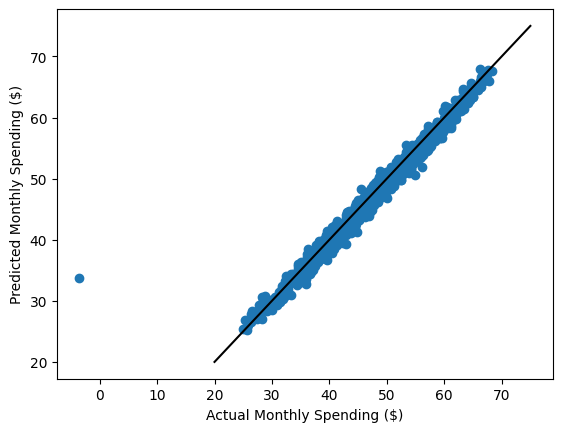

In [31]:
# Evaluate the model with evaluate() on the test data to see accuracy and other metrics set

# Predict model outputs for the testing results
pred = model.predict(x_test_scaled)

# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, pred)
# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, pred)
# Calculate the root mean squared error
rms_error = np.sqrt(mean_squared)
# Calculate the R2 score
R2 = r2_score(y_test, pred)
# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
# print("Mean squared error: ", mean_squared)
# print("Root mean squared error: ", rms_error)
print("R2: ", R2)

# Plot predicted vs. actual monthly spending
# Create a figure first
#plt.figure(figsize = (4, 3), dpi = 300)

# Create a scatterplot comparing the predicted vs. actual values
plt.scatter(y_test, pred)

# Draw a diagonal line to visually see how different both values are
plt.plot([20, 75], [20, 75], 'k-')

# Label both axes.
plt.xlabel("Actual Monthly Spending ($)")
plt.ylabel("Predicted Monthly Spending ($)")
plt.show()

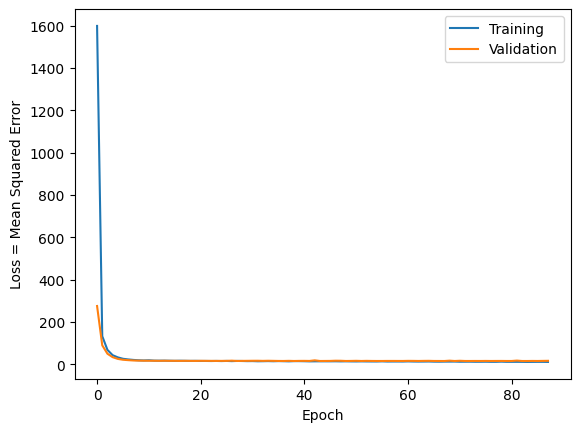

In [32]:
# Check for bias by plotting the loss function in each epoch for both data sets

# The history of the fitting
history_df = pd.DataFrame(history.history)

# Plot the history of the training and validation losses.
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
# Add a legend to the plot.
plt.legend()
# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Mean Squared Error")
# Show the plot.
plt.show()

In [34]:
# Hyperparameter tuning by increasing number of layers

# Create just like before
model = Sequential()
model.add(Input(shape=(10,)))

# Now the 1st dense layer with neurons and activation function
model.add(Dense(units = 64, activation = "relu"))
# Reduce overfitting by dropping out 20% of neurons in the layer temporarily
model.add(Dropout(0.2))

# 2nd hidden layer
model.add(Dense(units = 64, activation = "relu"))

# 3rd hidden to tune
model.add(Dense(units = 64, activation = "relu"))

model.add(Dense(units = 1, activation = "linear"))
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,089 (35.50 KB)

 Trainable params: 9,089 (35.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1605.1093 - mean_squared_error: 1605.1093 - val_loss: 101.1602 - val_mean_squared_error: 101.1602
Epoch 2/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 79.4172 - mean_squared_error: 79.4172 - val_loss: 29.3215 - val_mean_squared_error: 29.3215
Epoch 3/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 30.1498 - mean_squared_error: 30.1498 - val_loss: 19.8919 - val_mean_squared_error: 19.8919
Epoch 4/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 25.1019 - mean_squared_error: 25.1019 - val_loss: 17.3014 - val_mean_squared_error: 17.3014
Epoch 5/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16.7660 - mean_squared_error: 16.7660 - val_loss: 16.8475 - val_mean_squared_error: 16.8475
Epoch 6/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 17.6893 - mean_squared_error: 17.6893 - val_loss: 16.2684 - val_mean_squared_error: 16.2684
Epoch 7/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 22.5847 - mean_squared_error:

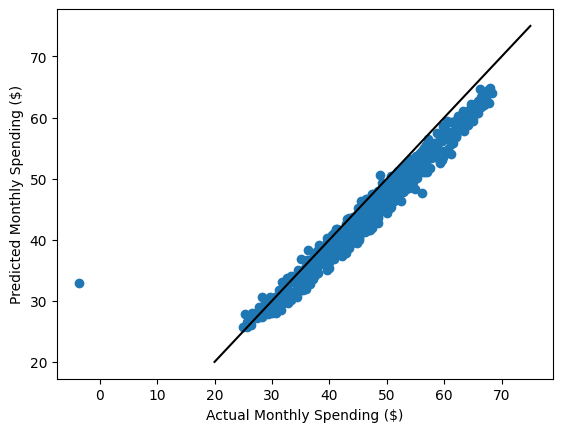

In [35]:
# Compile 
model.compile(optimizer="adam", loss='mean_squared_error', metrics=['mean_squared_error'])

# Train 
early_stopping = EarlyStopping(monitor='val_loss', patience = 20)
history = model.fit(x = x_train_scaled, y = y_train, batch_size = None, epochs = 200,
                    verbose = "auto", validation_split = 0.1, callbacks = [early_stopping])

# Evaluate
pred = model.predict(x_test_scaled)

# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, pred)
# Calculate the R2 score
R2 = r2_score(y_test, pred)
# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("R2: ", R2)

# Create a scatterplot comparing the predicted vs. actual values
plt.scatter(y_test, pred)

# Draw a diagonal line to visually see how different both values are
plt.plot([20, 75], [20, 75], 'k-')

# Label both axes.
plt.xlabel("Actual Monthly Spending ($)")
plt.ylabel("Predicted Monthly Spending ($)")
plt.show()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2184.2729 - mean_squared_error: 2184.2729 - val_loss: 1753.3506 - val_mean_squared_error: 1753.3506
Epoch 2/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1539.4230 - mean_squared_error: 1539.4230 - val_loss: 846.0605 - val_mean_squared_error: 846.0605
Epoch 3/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 675.3801 - mean_squared_error: 675.3801 - val_loss: 258.6812 - val_mean_squared_error: 258.6812
Epoch 4/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 217.2817 - mean_squared_error: 217.2817 - val_loss: 136.2269 - val_mean_squared_error: 136.2269
Epoch 5/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 137.5761 - mean_squared_error: 137.5761 - val_loss: 118.7416 - val_mean_squared_error: 118.7416
Epoch 6/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 125.9756 - mean_squared_error: 125.9756 - val_loss: 104.8536 - val_mean_squared_error: 104.8536
Epoch 7/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 103.7

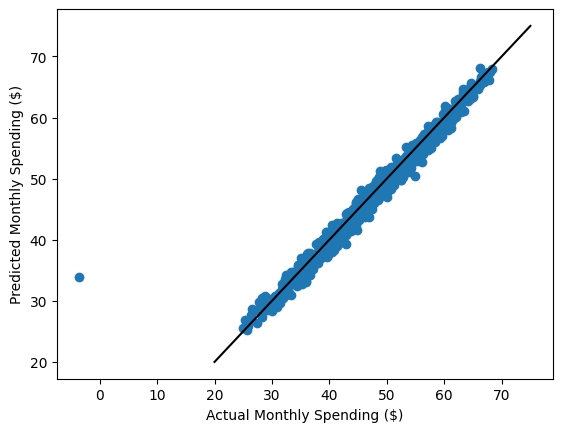

In [36]:
# Hyperparameter tuning by decreasing number of layers

# Create just like before
model = Sequential()
model.add(Input(shape=(10,)))

# Now the 1st dense layer with neurons and activation function
model.add(Dense(units = 64, activation = "relu"))
# Reduce overfitting by dropping out 20% of neurons in the layer temporarily
model.add(Dropout(0.2))


model.add(Dense(units = 1, activation = "linear"))
model.summary()

# Compile 
model.compile(optimizer="adam", loss='mean_squared_error', metrics=['mean_squared_error'])

# Train 
early_stopping = EarlyStopping(monitor='val_loss', patience = 20)
history = model.fit(x = x_train_scaled, y = y_train, batch_size = None, epochs = 200,
                    verbose = "auto", validation_split = 0.1, callbacks = [early_stopping])

# Evaluate
pred = model.predict(x_test_scaled)

# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, pred)
# Calculate the R2 score
R2 = r2_score(y_test, pred)
# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("R2: ", R2)

# Create a scatterplot comparing the predicted vs. actual values
plt.scatter(y_test, pred)

# Draw a diagonal line to visually see how different both values are
plt.plot([20, 75], [20, 75], 'k-')

# Label both axes.
plt.xlabel("Actual Monthly Spending ($)")
plt.ylabel("Predicted Monthly Spending ($)")
plt.show()

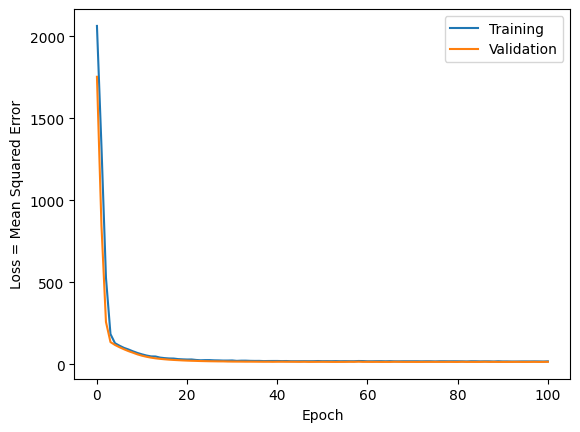

In [37]:
    # Check for bias by plotting the loss function in each epoch for both data sets
    
    history_df = pd.DataFrame(history.history)
    
    # Plot the history of the training and validation losses.
    plt.plot(history_df["loss"], label = "Training")
    plt.plot(history_df["val_loss"], label = "Validation")
    # Add a legend to the plot.
    plt.legend()
    # Label both axes.
    plt.xlabel("Epoch")
    plt.ylabel("Loss = Mean Squared Error")
    # Show the plot.
    plt.show()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1311.7540 - mean_squared_error: 1311.7540 - val_loss: 88.7391 - val_mean_squared_error: 88.7391
Epoch 2/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 78.2122 - mean_squared_error: 78.2122 - val_loss: 36.1490 - val_mean_squared_error: 36.1490
Epoch 3/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 37.5231 - mean_squared_error: 37.5231 - val_loss: 24.2214 - val_mean_squared_error: 24.2214
Epoch 4/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 25.5654 - mean_squared_error: 25.5654 - val_loss: 18.5779 - val_mean_squared_error: 18.5779
Epoch 5/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20.6365 - mean_squared_error: 20.6365 - val_loss: 16.8358 - val_mean_squared_error: 16.8358
Epoch 6/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 22.8582 - mean_squared_error: 22.8582 - val_loss: 16.3382 - val_mean_squared_error: 16.3382
Epoch 7/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24.2580 - mean_squared_error: 2

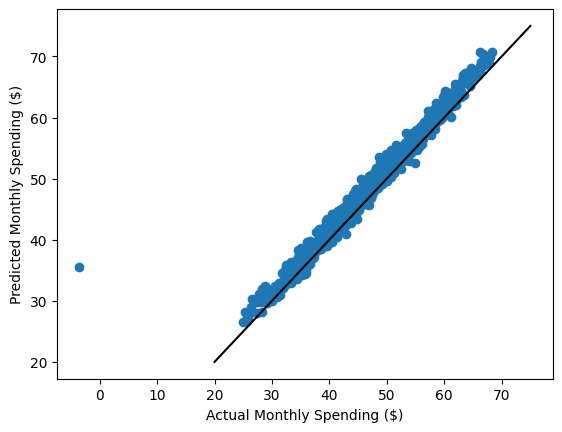

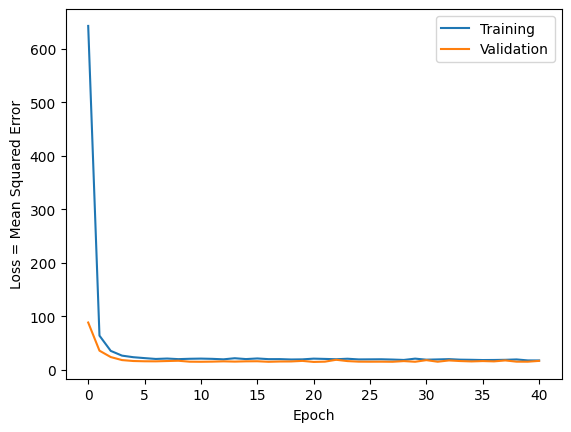

In [38]:
# Hyperparameter tuning by varying learning rate in Adam optimizer (default = 0.001)

# Adam optimizer hypertuning
adam_optimizer = Adam(learning_rate = 0.01)

# Create just like before
model = Sequential()
model.add(Input(shape=(10,)))

# Now the 1st dense layer with neurons and activation function
model.add(Dense(units = 64, activation = "relu"))
# Reduce overfitting by dropping out 20% of neurons in the layer temporarily
model.add(Dropout(0.2))


model.add(Dense(units = 1, activation = "linear"))
model.summary()

# Compile 
model.compile(optimizer=adam_optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])

# Train 
early_stopping = EarlyStopping(monitor='val_loss', patience = 20)
history = model.fit(x = x_train_scaled, y = y_train, batch_size = None, epochs = 200,
                    verbose = "auto", validation_split = 0.1, callbacks = [early_stopping])

# Evaluate
pred = model.predict(x_test_scaled)

# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, pred)
# Calculate the R2 score
R2 = r2_score(y_test, pred)
# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("R2: ", R2)

# Create a scatterplot comparing the predicted vs. actual values
plt.scatter(y_test, pred)

# Draw a diagonal line to visually see how different both values are
plt.plot([20, 75], [20, 75], 'k-')

# Label both axes.
plt.xlabel("Actual Monthly Spending ($)")
plt.ylabel("Predicted Monthly Spending ($)")
plt.show()

# Check for bias by plotting the loss function in each epoch for both data sets
history_df = pd.DataFrame(history.history)

# Plot the history of the training and validation losses.
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
# Add a legend to the plot.
plt.legend()
# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Mean Squared Error")
# Show the plot.
plt.show()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2165.3823 - mean_squared_error: 2165.3823 - val_loss: 1729.0953 - val_mean_squared_error: 1729.0953
Epoch 2/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1528.8768 - mean_squared_error: 1528.8768 - val_loss: 853.1312 - val_mean_squared_error: 853.1312
Epoch 3/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 680.5453 - mean_squared_error: 680.5453 - val_loss: 279.8239 - val_mean_squared_error: 279.8239
Epoch 4/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 235.3859 - mean_squared_error: 235.3859 - val_loss: 143.2357 - val_mean_squared_error: 143.2357
Epoch 5/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 138.7857 - mean_squared_error: 138.7857 - val_loss: 123.6326 - val_mean_squared_error: 123.6326
Epoch 6/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 120.9899 - mean_squared_error: 120.9899 - val_loss: 109.8196 - val_mean_squared_error: 109.8196
Epoch 7/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 108.7

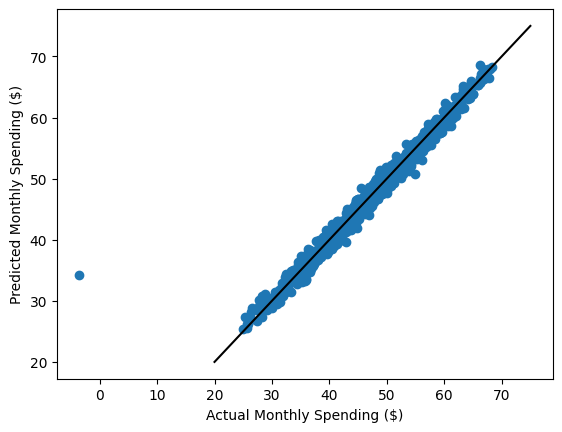

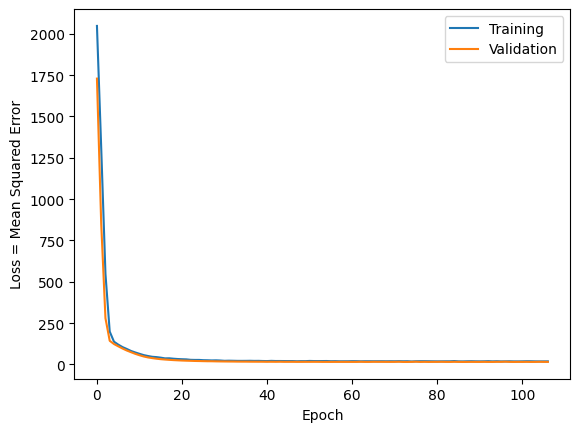

In [39]:
# Hyperparameter tuning by varying learning rate in Adam optimizer (default = 0.001)

# Adam optimizer hypertuning
adam_optimizer = Adam(learning_rate = 0.0001)

# Create just like before
model = Sequential()
model.add(Input(shape=(10,)))

# Now the 1st dense layer with neurons and activation function
model.add(Dense(units = 64, activation = "relu"))
# Reduce overfitting by dropping out 20% of neurons in the layer temporarily
model.add(Dropout(0.2))


model.add(Dense(units = 1, activation = "linear"))
model.summary()

# Compile 
model.compile(optimizer="adam", loss='mean_squared_error', metrics=['mean_squared_error'])

# Train 
early_stopping = EarlyStopping(monitor='val_loss', patience = 20)
history = model.fit(x = x_train_scaled, y = y_train, batch_size = None, epochs = 200,
                    verbose = "auto", validation_split = 0.1, callbacks = [early_stopping])

# Evaluate
pred = model.predict(x_test_scaled)

# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, pred)
# Calculate the R2 score
R2 = r2_score(y_test, pred)
# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("R2: ", R2)

# Create a scatterplot comparing the predicted vs. actual values
plt.scatter(y_test, pred)

# Draw a diagonal line to visually see how different both values are
plt.plot([20, 75], [20, 75], 'k-')

# Label both axes.
plt.xlabel("Actual Monthly Spending ($)")
plt.ylabel("Predicted Monthly Spending ($)")
plt.show()

# Check for bias by plotting the loss function in each epoch for both data sets
history_df = pd.DataFrame(history.history)

# Plot the history of the training and validation losses.
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
# Add a legend to the plot.
plt.legend()
# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Mean Squared Error")
# Show the plot.
plt.show()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2252.8667 - mean_squared_error: 2252.8667 - val_loss: 2239.8728 - val_mean_squared_error: 2239.8728
Epoch 2/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2239.5046 - mean_squared_error: 2239.5046 - val_loss: 2207.1392 - val_mean_squared_error: 2207.1392
Epoch 3/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2192.1292 - mean_squared_error: 2192.1292 - val_loss: 2170.5671 - val_mean_squared_error: 2170.5671
Epoch 4/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2160.9202 - mean_squared_error: 2160.9202 - val_loss: 2128.4497 - val_mean_squared_error: 2128.4497
Epoch 5/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2100.2605 - mean_squared_error: 2100.2605 - val_loss: 2079.4724 - val_mean_squared_error: 2079.4724
Epoch 6/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2072.7458 - mean_squared_error: 2072.7458 - val_loss: 2023.3018 - val_mean_squared_error: 2023.3018
Epoch 7/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/

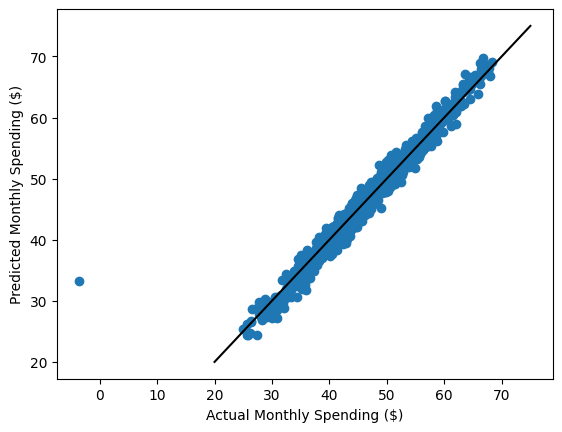

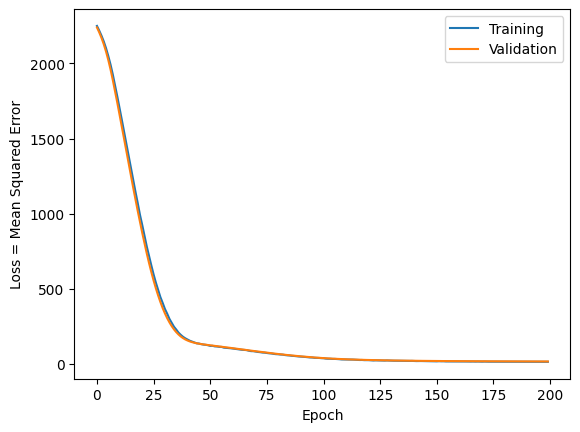

In [40]:
# Hyperparameter tuning by varying dropout rate (10%)

# Adam optimizer hypertuning
adam_optimizer = Adam(learning_rate = 0.0001)

# Create just like before
model = Sequential()
model.add(Input(shape=(10,)))

# Now the 1st dense layer with neurons and activation function
model.add(Dense(units = 64, activation = "relu"))
# Reduce overfitting by dropping out 20% of neurons in the layer temporarily
model.add(Dropout(0.1))


model.add(Dense(units = 1, activation = "linear"))
model.summary()

# Compile 
model.compile(optimizer=adam_optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])

# Train 
early_stopping = EarlyStopping(monitor='val_loss', patience = 20)
history = model.fit(x = x_train_scaled, y = y_train, batch_size = None, epochs = 200,
                    verbose = "auto", validation_split = 0.1, callbacks = [early_stopping])

# Evaluate
pred = model.predict(x_test_scaled)

# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, pred)
# Calculate the R2 score
R2 = r2_score(y_test, pred)
# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("R2: ", R2)

# Create a scatterplot comparing the predicted vs. actual values
plt.scatter(y_test, pred)

# Draw a diagonal line to visually see how different both values are
plt.plot([20, 75], [20, 75], 'k-')

# Label both axes.
plt.xlabel("Actual Monthly Spending ($)")
plt.ylabel("Predicted Monthly Spending ($)")
plt.show()

# Check for bias by plotting the loss function in each epoch for both data sets
history_df = pd.DataFrame(history.history)

# Plot the history of the training and validation losses.
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
# Add a legend to the plot.
plt.legend()
# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Mean Squared Error")
# Show the plot.
plt.show()

In [14]:
# Classifying customer churn on neural network 

# Start by extracting the three numerical input features.
num_feature_names = ["Monthly_Spend", "Age", "Subscription_Length", "Support_Tickets_Raised",
                "Satisfaction_Score", "Discount_Offered", "Last_Activity"]
x_numerical = df[num_feature_names]

# Scale the numerical features using the min-max scaler.
scale = MinMaxScaler()
scale.fit(x_numerical)
x_numerical_scaled = scale.transform(x_numerical)

# Next, extract the categorical variables
x_cat = df[["Gender", "Region", "Payment_Method"]]
# Apply Label Encoding to the variables
label = LabelEncoder()
x_cat_label = pd.DataFrame({
    "Gender": label.fit(df["Gender"]).transform(df["Gender"]),
    "Region": label.fit(df["Region"]).transform(df["Region"]),
    "Payment_Method": label.fit(df["Payment_Method"]).transform(df["Payment_Method"])
})

# Combine categorical and numerical features
x = np.concatenate((x_numerical_scaled, x_cat_label), axis = 1)

# Extract the output feature
y_cat = df["Churned"]

# Reshape to 2D array
y_cat = y_cat.to_numpy().reshape(-1, 1)

# Fit the encoder to the categorical data
ohe = OneHotEncoder()
ohe.fit(y_cat)

# Apply the encoder to the categorical data
y = ohe.transform(y_cat)

# Convert the output from the encoder to a numpy array
y = y.toarray()

# Split the x and y data between the training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 23)

# Make the model
model = Sequential()
model.add(Input(shape=(10,)))
model.add(Dense(units = 64, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(units = 256, activation = "relu"))

# The output layer will have 2 units for 0 or 1
# Softmax activation function to get probabilities of both class labels that the network outputs
model.add(Dense(units = 2, activation = "softmax"))

model.summary()

# Compile the model with the default Adam optimiser
# The categorical_crossentropy loss function is used
# Accuracy, precision, recall, f1-score, and support for metrics
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics= ['accuracy', 'precision','recall'])

early_stopping = EarlyStopping(monitor='val_loss', patience = 30)

history = model.fit(x = x_train, y = y_train, batch_size = None, epochs = 200,
                    verbose = "auto", validation_split = 0.1, callbacks = [early_stopping])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,858 (69.76 KB)

 Trainable params: 17,858 (69.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6240 - loss: 0.6387 - precision: 0.6240 - recall: 0.6240 - val_accuracy: 0.8277 - val_loss: 0.4381 - val_precision: 0.8277 - val_recall: 0.8277
Epoch 2/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7879 - loss: 0.4597 - precision: 0.7879 - recall: 0.7879 - val_accuracy: 0.8400 - val_loss: 0.3776 - val_precision: 0.8400 - val_recall: 0.8400
Epoch 3/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8001 - loss: 0.4331 - precision: 0.8001 - recall: 0.8001 - val_accuracy: 0.8462 - val_loss: 0.3547 - val_precision: 0.8462 - val_recall: 0.8462
Epoch 4/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8145 - loss: 0.4048 - precision: 0.8145 - recall: 0.8145 - val_accuracy: 0.8646 - val_loss: 0.3249 - val_precision: 0.8646 - val_recall: 0.8646
Epoch 5/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8289 - loss: 0.3682 - precision: 0.8289 - recall: 0.8289 - val_accuracy: 0.8708 - val_loss: 0.3050

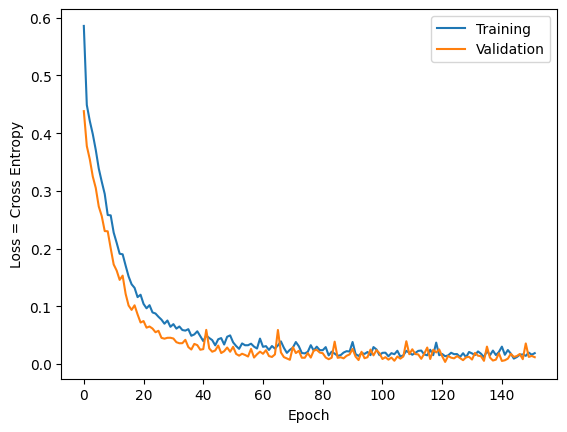

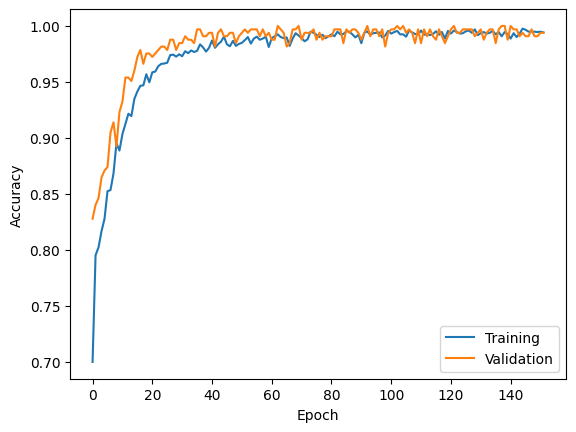

In [16]:
# Create a df with the history of the fitting
history_df = pd.DataFrame(history.history)

# Plot the training and validation losses
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")

# Add a legend to the plot
plt.legend()
# Label both axes
plt.xlabel("Epoch")
plt.ylabel("Loss = Cross Entropy")
# Show the plot
plt.show()

# Plot the training and validation accuracy
plt.plot(history_df["accuracy"], label = "Training")
plt.plot(history_df["val_accuracy"], label = "Validation")
# Add a legend to the plot
plt.legend()
# Label both axes
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
# Show the plot
plt.show()

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


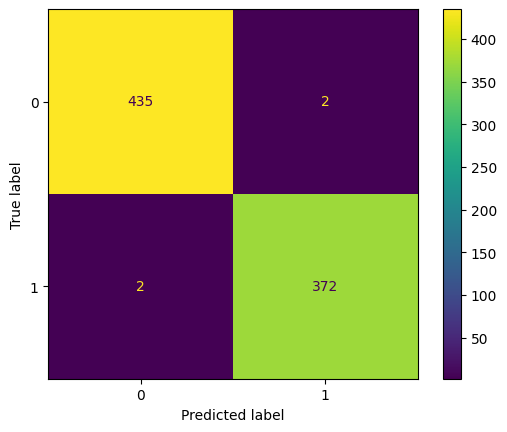

In [18]:
# Visualise the predictions of the model using a confusion matrix 
pred = model.predict(x_test)

# Extract the index of the label with the highest probability for each customer
pred_class = np.argmax(pred,axis=1)

# Get the actual class labels for the testing set
y_test_class = np.argmax(y_test, axis = 1)

# The names of each label retrieved from the OneHotEncoder class instance from before
display_labels = ohe.categories_[0]

# Get the numerical index of each label
numerical_labels = np.unique(y_test_class)

# Make the confusion matrix
con_mat = confusion_matrix(y_test_class, pred_class, labels = numerical_labels)
ax = plt.axes()

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels = display_labels)

# Show
disp.plot(ax = ax)
plt.show()

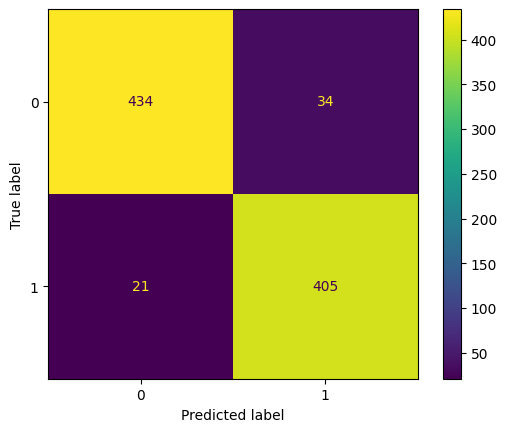

In [19]:
# Classifying customer churn with k-nearest neighbour algorithm 

# Start by extracting the three numerical input features.
feature_names = ["Monthly_Spend", "Age", "Subscription_Length", "Support_Tickets_Raised",
                "Satisfaction_Score", "Discount_Offered", "Last_Activity"]
x = df[feature_names]

# Output features
y = df["Churned"]


# Use SMOTE to make k-nearest neighbour algorithm model for classifying churned
sm = SMOTE(random_state=23, k_neighbors = 2)

# Resample original data 
x_res, y_res = sm.fit_resample(x, y)

# Split data for train and test
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size = 0.2, random_state=23)

# Scale, fit, and apply transformations to data
scale = StandardScaler()
scale.fit(x_train)
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

# Set up the KNeighboursClassifier model
model = KNeighborsClassifier()
# Fit the model to the training data.
model.fit(x_train_scaled,y_train)


# Use the trained model to predict the output class for training set
pred = model.predict(x_test_scaled)


# Calculate the confusion matrix
numerical_labels = np.unique(y_test)
con_mat = confusion_matrix(y_test, pred, labels = numerical_labels)
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = con_mat)
disp.plot()


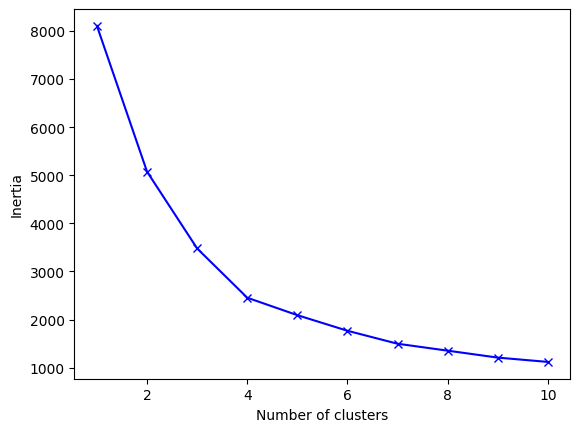

In [9]:
# Exploring k-Means clustering algorithms on streaming service dataset

# Extract the input features
feature_names = ["Age", "Monthly_Spend"]
x = df[feature_names]

# Fit to standard scaler
scale = StandardScaler()
scale.fit(x)

# Apply transformation to column in x
x_scaled = scale.transform(x)

# Create a list to record the inertia for each value of k
inertia = []

# Define the range of values of k
k_range = range(1, 11)

# Loop through the possible values of k
for k in k_range:
    # Initialise the model
    kmeans = KMeans(n_clusters = k, random_state = 23)
    # Fit the model to the scaled data
    kmeans.fit(x_scaled)
    # Record the inertia
    inertia.append(kmeans.inertia_)

# Use matplotlib to plot the inertia versus k
plt.plot(k_range, inertia, 'bx-')
# Label the axes
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
# Show the figure
plt.show()

Davies Bouldin Index: 0.8682
Silhouette Coefficient: 0.3616


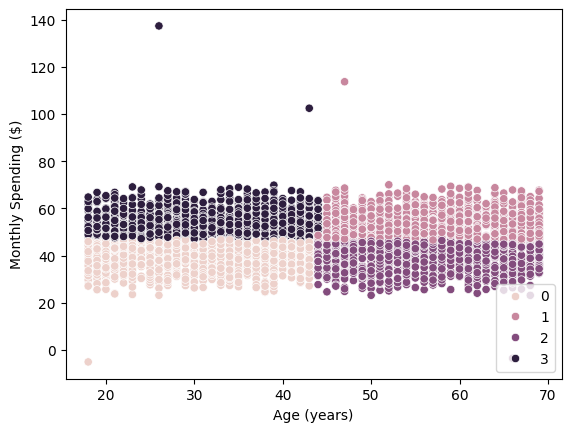

In [12]:
# Fit the final k-Means model
kmeans_final = KMeans(n_clusters = 4, random_state = 23)

kmeans_final.fit(x_scaled)
# Use this fit to predict the cluster labels for each data point in the dataset
cluster_labels_pred = kmeans_final.predict(x_scaled)

# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)

# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, cluster_labels_pred)

# Print the results
print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

# Visualise the clusters in a scatter plot
sns.scatterplot(data = df, x = "Age", y = "Monthly_Spend", hue = cluster_labels_pred)
# Add a legend to show the cluster labels
plt.legend(loc = "lower right")
# Label both axes
plt.xlabel("Age (years)")
plt.ylabel("Monthly Spending ($)")
# Show the figure
plt.show()

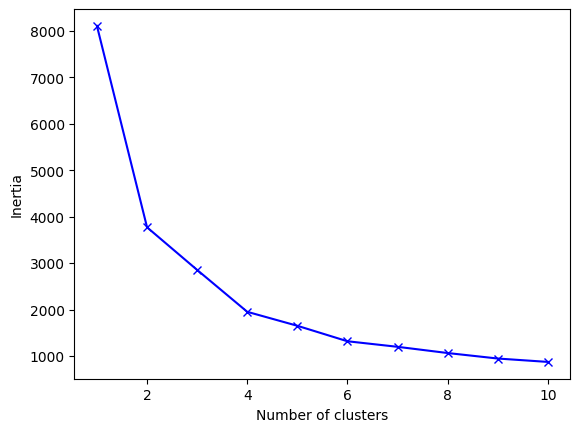

Davies Bouldin Index: 0.8429
Silhouette Coefficient: 0.4488


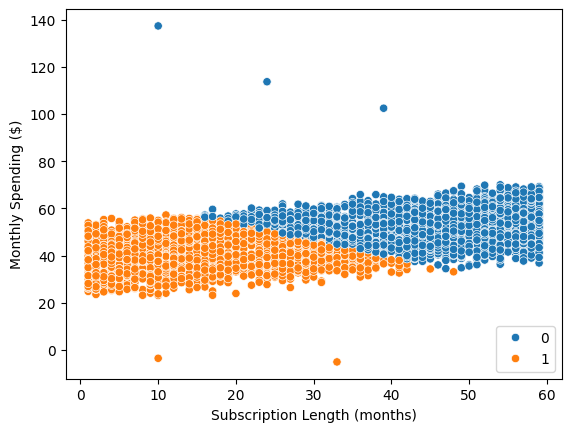

In [14]:
# Exploring k-Means clustering algorithms on streaming service dataset

# Extract the input features
feature_names = ["Subscription_Length", "Monthly_Spend"]
x = df[feature_names]

# Fit to standard scaler
scale = StandardScaler()
scale.fit(x)

# Apply transformation to column in x
x_scaled = scale.transform(x)

# Create a list to record the inertia for each value of k
inertia = []

# Define the range of values of k
k_range = range(1, 11)

# Loop through the possible values of k
for k in k_range:
    # Initialise the model
    kmeans = KMeans(n_clusters = k, random_state = 23)
    # Fit the model to the scaled data
    kmeans.fit(x_scaled)
    # Record the inertia
    inertia.append(kmeans.inertia_)

# Use matplotlib to plot the inertia versus k
plt.plot(k_range, inertia, 'bx-')
# Label the axes
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
# Show the figure
plt.show()


# Fit the final k-Means model
kmeans_final = KMeans(n_clusters = 2, random_state = 23)

kmeans_final.fit(x_scaled)
# Use this fit to predict the cluster labels for each data point in the dataset
cluster_labels_pred = kmeans_final.predict(x_scaled)

# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)

# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, cluster_labels_pred)

# Print the results
print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

# Visualise the clusters in a scatter plot
sns.scatterplot(data = df, x = "Subscription_Length", y = "Monthly_Spend", hue = cluster_labels_pred)
# Add a legend to show the cluster labels
plt.legend(loc = "lower right")
# Label both axes
plt.xlabel("Subscription Length (months)")
plt.ylabel("Monthly Spending ($)")
# Show the figure
plt.show()

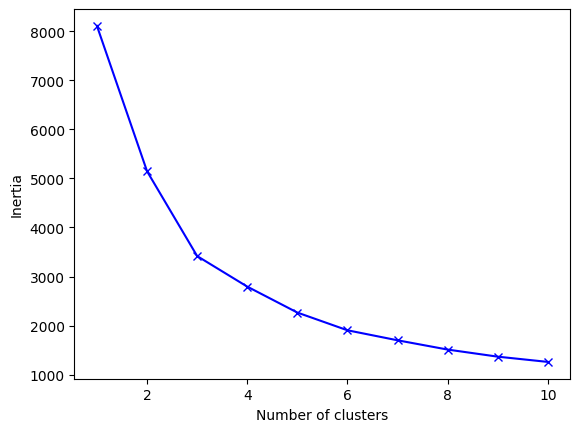

Davies Bouldin Index: 0.9167
Silhouette Coefficient: 0.3642


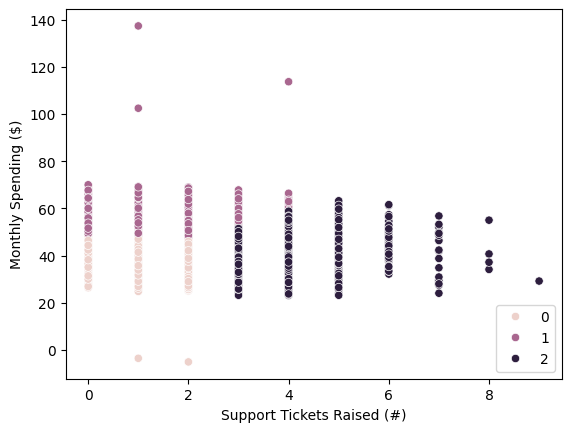

In [16]:
# Exploring k-Means clustering algorithms on streaming service dataset

# Extract the input features
feature_names = ["Support_Tickets_Raised", "Monthly_Spend"]
x = df[feature_names]

# Fit to standard scaler
scale = StandardScaler()
scale.fit(x)

# Apply transformation to column in x
x_scaled = scale.transform(x)

# Create a list to record the inertia for each value of k
inertia = []

# Define the range of values of k
k_range = range(1, 11)

# Loop through the possible values of k
for k in k_range:
    # Initialise the model
    kmeans = KMeans(n_clusters = k, random_state = 23)
    # Fit the model to the scaled data
    kmeans.fit(x_scaled)
    # Record the inertia
    inertia.append(kmeans.inertia_)

# Use matplotlib to plot the inertia versus k
plt.plot(k_range, inertia, 'bx-')
# Label the axes
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
# Show the figure
plt.show()


# Fit the final k-Means model
kmeans_final = KMeans(n_clusters = 3, random_state = 23)

kmeans_final.fit(x_scaled)
# Use this fit to predict the cluster labels for each data point in the dataset
cluster_labels_pred = kmeans_final.predict(x_scaled)

# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)

# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, cluster_labels_pred)

# Print the results
print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

# Visualise the clusters in a scatter plot
sns.scatterplot(data = df, x = "Support_Tickets_Raised", y = "Monthly_Spend", hue = cluster_labels_pred)
# Add a legend to show the cluster labels
plt.legend(loc = "lower right")
# Label both axes
plt.xlabel("Support Tickets Raised (#)")
plt.ylabel("Monthly Spending ($)")
# Show the figure
plt.show()

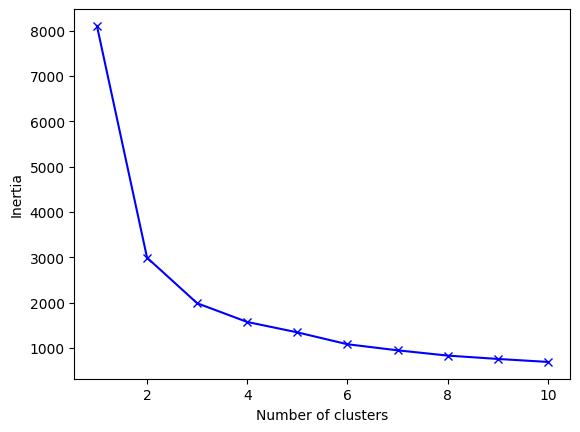

Davies Bouldin Index: 0.6846
Silhouette Coefficient: 0.5186


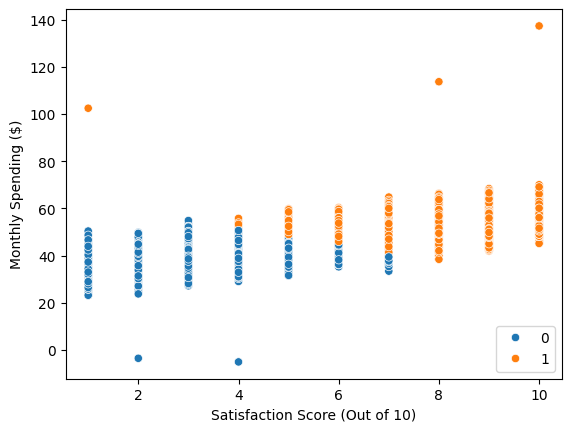

In [18]:
# Exploring k-Means clustering algorithms on streaming service dataset

# Extract the input features
feature_names = ["Satisfaction_Score", "Monthly_Spend"]
x = df[feature_names]

# Fit to standard scaler
scale = StandardScaler()
scale.fit(x)

# Apply transformation to column in x
x_scaled = scale.transform(x)

# Create a list to record the inertia for each value of k
inertia = []

# Define the range of values of k
k_range = range(1, 11)

# Loop through the possible values of k
for k in k_range:
    # Initialise the model
    kmeans = KMeans(n_clusters = k, random_state = 23)
    # Fit the model to the scaled data
    kmeans.fit(x_scaled)
    # Record the inertia
    inertia.append(kmeans.inertia_)

# Use matplotlib to plot the inertia versus k
plt.plot(k_range, inertia, 'bx-')
# Label the axes
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
# Show the figure
plt.show()


# Fit the final k-Means model
kmeans_final = KMeans(n_clusters = 2, random_state = 23)

kmeans_final.fit(x_scaled)
# Use this fit to predict the cluster labels for each data point in the dataset
cluster_labels_pred = kmeans_final.predict(x_scaled)

# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)

# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, cluster_labels_pred)

# Print the results
print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

# Visualise the clusters in a scatter plot
sns.scatterplot(data = df, x = "Satisfaction_Score", y = "Monthly_Spend", hue = cluster_labels_pred)
# Add a legend to show the cluster labels
plt.legend(loc = "lower right")
# Label both axes
plt.xlabel("Satisfaction Score (Out of 10)")
plt.ylabel("Monthly Spending ($)")
# Show the figure
plt.show()

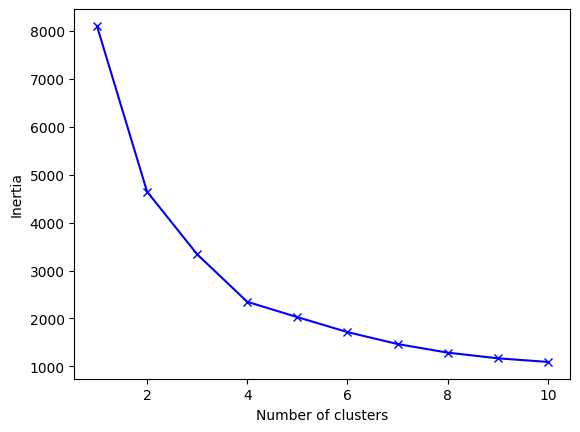

Davies Bouldin Index: 0.8709
Silhouette Coefficient: 0.3702


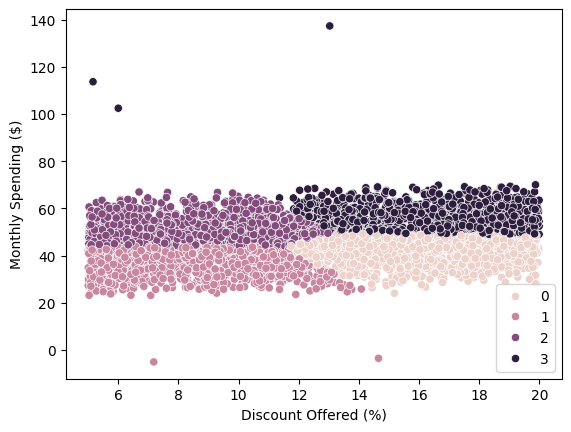

In [20]:
# Exploring k-Means clustering algorithms on streaming service dataset

# Extract the input features
feature_names = ["Discount_Offered", "Monthly_Spend"]
x = df[feature_names]

# Fit to standard scaler
scale = StandardScaler()
scale.fit(x)

# Apply transformation to column in x
x_scaled = scale.transform(x)

# Create a list to record the inertia for each value of k
inertia = []

# Define the range of values of k
k_range = range(1, 11)

# Loop through the possible values of k
for k in k_range:
    # Initialise the model
    kmeans = KMeans(n_clusters = k, random_state = 23)
    # Fit the model to the scaled data
    kmeans.fit(x_scaled)
    # Record the inertia
    inertia.append(kmeans.inertia_)

# Use matplotlib to plot the inertia versus k
plt.plot(k_range, inertia, 'bx-')
# Label the axes
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
# Show the figure
plt.show()


# Fit the final k-Means model
kmeans_final = KMeans(n_clusters = 4, random_state = 23)

kmeans_final.fit(x_scaled)
# Use this fit to predict the cluster labels for each data point in the dataset
cluster_labels_pred = kmeans_final.predict(x_scaled)

# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)

# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, cluster_labels_pred)

# Print the results
print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

# Visualise the clusters in a scatter plot
sns.scatterplot(data = df, x = "Discount_Offered", y = "Monthly_Spend", hue = cluster_labels_pred)
# Add a legend to show the cluster labels
plt.legend(loc = "lower right")
# Label both axes
plt.xlabel("Discount Offered (%)")
plt.ylabel("Monthly Spending ($)")
# Show the figure
plt.show()

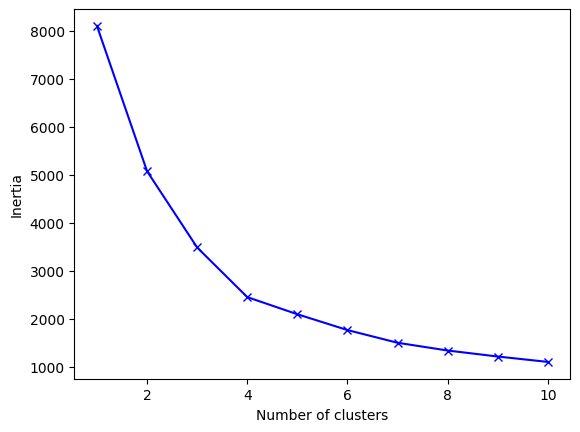

Davies Bouldin Index: 0.8672
Silhouette Coefficient: 0.3615


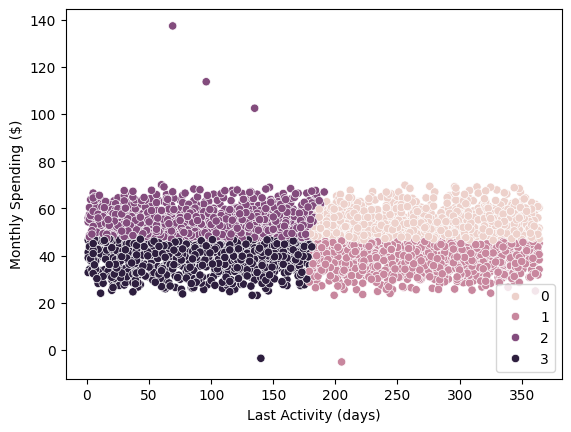

In [32]:
# Exploring k-Means clustering algorithms on streaming service dataset

# Extract the input features
feature_names = ["Last_Activity", "Monthly_Spend"]
x = df[feature_names]

# Fit to standard scaler
scale = StandardScaler()
scale.fit(x)

# Apply transformation to column in x
x_scaled = scale.transform(x)

# Create a list to record the inertia for each value of k
inertia = []

# Define the range of values of k
k_range = range(1, 11)

# Loop through the possible values of k
for k in k_range:
    # Initialise the model
    kmeans = KMeans(n_clusters = k, random_state = 23)
    # Fit the model to the scaled data
    kmeans.fit(x_scaled)
    # Record the inertia
    inertia.append(kmeans.inertia_)

# Use matplotlib to plot the inertia versus k
plt.plot(k_range, inertia, 'bx-')
# Label the axes
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
# Show the figure
plt.show()


# Fit the final k-Means model
kmeans_final = KMeans(n_clusters = 4, random_state = 23)

kmeans_final.fit(x_scaled)
# Use this fit to predict the cluster labels for each data point in the dataset
cluster_labels_pred = kmeans_final.predict(x_scaled)

# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)

# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, cluster_labels_pred)

# Print the results
print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

# Visualise the clusters in a scatter plot
sns.scatterplot(data = df, x = "Last_Activity", y = "Monthly_Spend", hue = cluster_labels_pred)
# Add a legend to show the cluster labels
plt.legend(loc = "lower right")
# Label both axes
plt.xlabel("Last Activity (days)")
plt.ylabel("Monthly Spending ($)")
# Show the figure
plt.show()

Davies Bouldin Index: 5.3284
Silhouette Coefficient: 0.6143


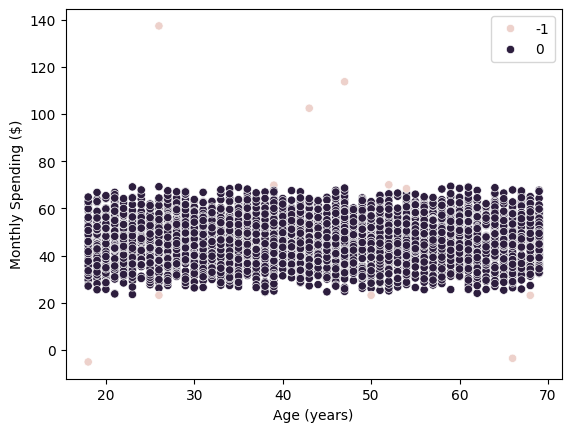

In [24]:
# Using DBSCAN on streaming service dataset

# Extract the input features
feature_names = ["Age", "Monthly_Spend"]
x = df[feature_names]

# Scale the input features
scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

# Create DBSCAN instance and set the eps (radius) and min_samples parameters
dbscan = DBSCAN(eps=0.2, min_samples=3)

# Fit the model to the input data and output the predicted cluster labels
dbscan_labels_pred = dbscan.fit_predict(x_scaled)

# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, dbscan_labels_pred)
# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, dbscan_labels_pred)

# Print the results
print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

# Visualise the clusters
sns.scatterplot(data = df, x = "Age", y = "Monthly_Spend", hue = dbscan_labels_pred)
# Label both axes
plt.xlabel("Age (years)")
plt.ylabel("Monthly Spending ($)")
# Show the plot
plt.show()

Davies Bouldin Index: 3.9274
Silhouette Coefficient: 0.6785


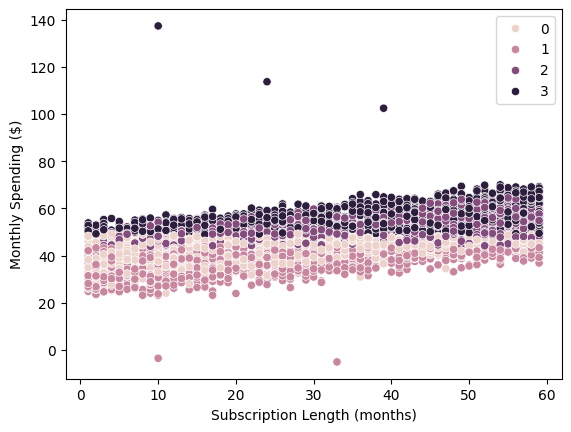

In [25]:
# Using DBSCAN on streaming service dataset

# Extract the input features
feature_names = ["Subscription_Length", "Monthly_Spend"]
x = df[feature_names]

# Scale the input features
scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

# Create DBSCAN instance and set the eps (radius) and min_samples parameters
dbscan = DBSCAN(eps=0.2, min_samples=3)

# Fit the model to the input data and output the predicted cluster labels
dbscan_labels_pred = dbscan.fit_predict(x_scaled)

# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, dbscan_labels_pred)
# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, dbscan_labels_pred)

# Print the results
print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

# Visualise the clusters in a scatter plot
sns.scatterplot(data = df, x = "Subscription_Length", y = "Monthly_Spend", hue = cluster_labels_pred)
# Label both axes
plt.xlabel("Subscription Length (months)")
plt.ylabel("Monthly Spending ($)")
# Show the figure
plt.show()

Davies Bouldin Index: 3.3771
Silhouette Coefficient: 0.1821


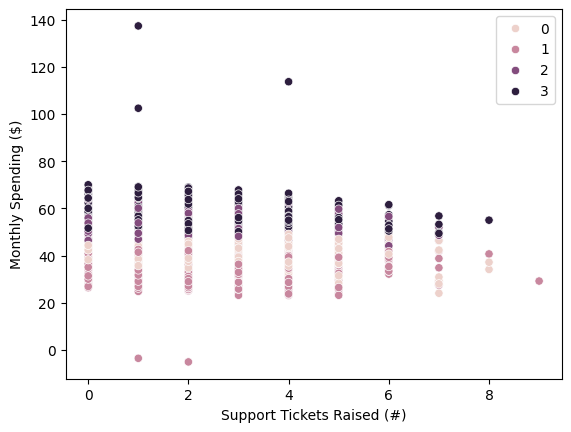

In [26]:
# Using DBSCAN on streaming service dataset

# Extract the input features
feature_names = ["Support_Tickets_Raised", "Monthly_Spend"]
x = df[feature_names]

# Scale the input features
scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

# Create DBSCAN instance and set the eps (radius) and min_samples parameters
dbscan = DBSCAN(eps=0.2, min_samples=3)

# Fit the model to the input data and output the predicted cluster labels
dbscan_labels_pred = dbscan.fit_predict(x_scaled)

# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, dbscan_labels_pred)
# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, dbscan_labels_pred)

# Print the results
print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

# Visualise the clusters in a scatter plot
sns.scatterplot(data = df, x = "Support_Tickets_Raised", y = "Monthly_Spend", hue = cluster_labels_pred)
# Label both axes
plt.xlabel("Support Tickets Raised (#)")
plt.ylabel("Monthly Spending ($)")
# Show the figure
plt.show()

Davies Bouldin Index: 3.5585
Silhouette Coefficient: 0.0816


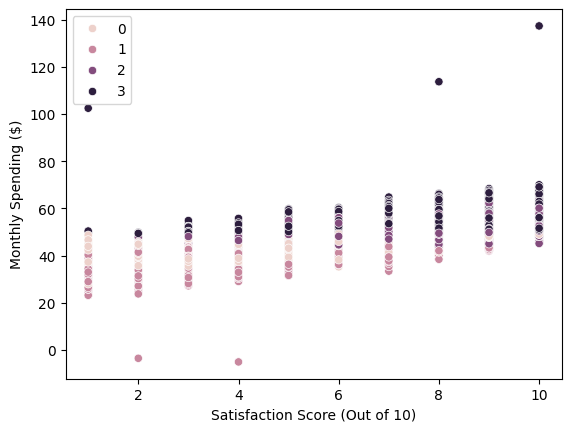

In [28]:
# Using DBSCAN on streaming service dataset

# Extract the input features
feature_names = ["Satisfaction_Score", "Monthly_Spend"]
x = df[feature_names]

# Scale the input features
scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

# Create DBSCAN instance and set the eps (radius) and min_samples parameters
dbscan = DBSCAN(eps=0.2, min_samples=3)

# Fit the model to the input data and output the predicted cluster labels
dbscan_labels_pred = dbscan.fit_predict(x_scaled)

# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, dbscan_labels_pred)
# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, dbscan_labels_pred)

# Print the results
print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

# Visualise the clusters in a scatter plot
sns.scatterplot(data = df, x = "Satisfaction_Score", y = "Monthly_Spend", hue = cluster_labels_pred)
# Label both axes
plt.xlabel("Satisfaction Score (Out of 10)")
plt.ylabel("Monthly Spending ($)")
# Show the figure
plt.show()

Davies Bouldin Index: 3.9959
Silhouette Coefficient: 0.6304


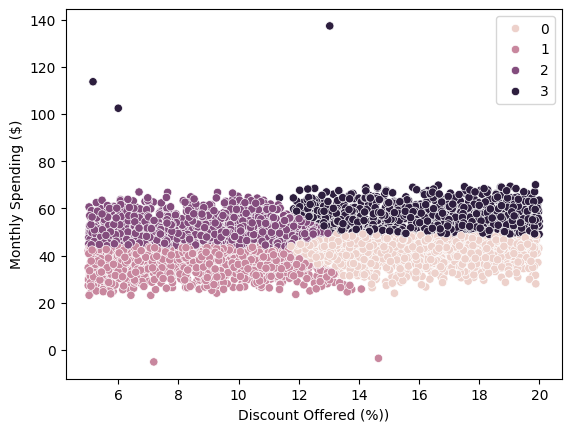

In [29]:
# Using DBSCAN on streaming service dataset

# Extract the input features
feature_names = ["Discount_Offered", "Monthly_Spend"]
x = df[feature_names]

# Scale the input features
scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

# Create DBSCAN instance and set the eps (radius) and min_samples parameters
dbscan = DBSCAN(eps=0.2, min_samples=3)

# Fit the model to the input data and output the predicted cluster labels
dbscan_labels_pred = dbscan.fit_predict(x_scaled)

# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, dbscan_labels_pred)
# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, dbscan_labels_pred)

# Print the results
print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

# Visualise the clusters in a scatter plot
sns.scatterplot(data = df, x = "Discount_Offered", y = "Monthly_Spend", hue = cluster_labels_pred)
# Label both axes
plt.xlabel("Discount Offered (%))")
plt.ylabel("Monthly Spending ($)")
# Show the figure
plt.show()

Davies Bouldin Index: 20.9596
Silhouette Coefficient: 0.6409


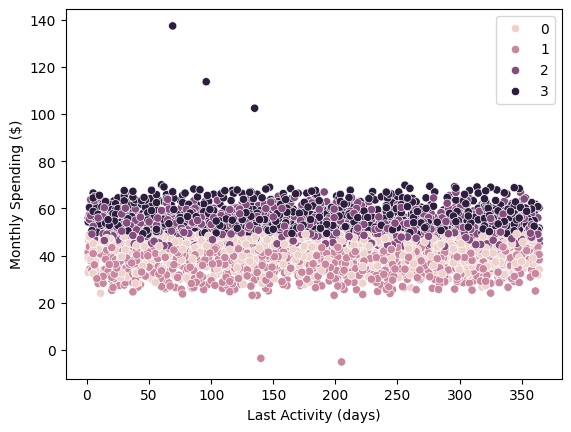

In [31]:
# Using DBSCAN on streaming service dataset

# Extract the input features
feature_names = ["Last_Activity", "Monthly_Spend"]
x = df[feature_names]

# Scale the input features
scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

# Create DBSCAN instance and set the eps (radius) and min_samples parameters
dbscan = DBSCAN(eps=0.2, min_samples=3)

# Fit the model to the input data and output the predicted cluster labels
dbscan_labels_pred = dbscan.fit_predict(x_scaled)

# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, dbscan_labels_pred)
# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, dbscan_labels_pred)

# Print the results
print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

# Visualise the clusters in a scatter plot
sns.scatterplot(data = df, x = "Last_Activity", y = "Monthly_Spend", hue = cluster_labels_pred)
# Label both axes
plt.xlabel("Last Activity (days)")
plt.ylabel("Monthly Spending ($)")
# Show the figure
plt.show()